<a href="https://colab.research.google.com/github/7201krap/PYTHON_applied_data_science/blob/main/search_dep_score.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sklearn import datasets

# How are we going to use evaluate the performance? 
# 1. accuracy
from sklearn import metrics
# 2. f1 score 
from sklearn.metrics import f1_score

# Machine learning models 

# Linear Regression 
# url : https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html
from sklearn.linear_model import LinearRegression

# SVM
# url: https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html
from sklearn import svm

# KNN 
# url: https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html
from sklearn.neighbors import KNeighborsClassifier

# Decision Tree
# url: https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html
from sklearn.tree import DecisionTreeClassifier

# Random Forest 
# url: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
from sklearn.ensemble import RandomForestClassifier

# Logistic Classifier
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV

from sklearn.model_selection import learning_curve, RandomizedSearchCV, GridSearchCV
from sklearn.model_selection import train_test_split, KFold
from sklearn.datasets import make_classification
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

import numpy as np
import matplotlib.pyplot as plt

# PCA 
from sklearn.decomposition import PCA 

# Linear Regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

import seaborn as sns

from sklearn.model_selection import learning_curve

from sklearn.metrics import classification_report

# Preprocessing

In [2]:
url = 'https://raw.githubusercontent.com/tomstark99/COMS30050/main/coursework/data/0%261/total_dep_score.csv'
total_dep_score = pd.read_csv(url)

X_t = total_dep_score.copy()
del X_t['dep_score']

y_t = total_dep_score['dep_score']

In [3]:
y_t.value_counts() 

0.0    2339
1.0     704
Name: dep_score, dtype: int64

In [4]:
2339 / (2339 + 704) 

0.7686493591850148

In [5]:
print(X_t)
print(y_t)

      comp_week  comp_wend  text_week  text_wend  tv_week  tv_wend
0             2          2          1          1        2        2
1             2          1          1          1        2        3
2             3          3          3          1        2        2
3             1          2          1          1        1        2
4             2          3          0          0        2        2
...         ...        ...        ...        ...      ...      ...
3038          3          3          2          2        2        3
3039          2          3          1          1        1        2
3040          0          0          0          0        2        0
3041          2          3          1          1        1        2
3042          1          2          2          2        0        1

[3043 rows x 6 columns]
0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
       ... 
3038    0.0
3039    0.0
3040    0.0
3041    1.0
3042    0.0
Name: dep_score, Length: 3043, dtype: f

In [6]:
url = 'https://raw.githubusercontent.com/tomstark99/COMS30050/main/coursework/data/0%261/sampled_dep_score.csv'
sampled_dep_score = pd.read_csv(url)

X_s = sampled_dep_score.copy()
del X_s['dep_score']

y_s = sampled_dep_score['dep_score']

In [7]:
y_s.value_counts()

1.0    704
0.0    704
Name: dep_score, dtype: int64

In [8]:
print(X_s)
print(y_s)

      comp_week  comp_wend  text_week  text_wend  tv_week  tv_wend
0             2          2          1          1        2        2
1             1          1          1          1        1        2
2             1          2          0          0        1        1
3             3          3          2          2        2        1
4             2          2          3          3        2        2
...         ...        ...        ...        ...      ...      ...
1403          3          3          2          2        2        1
1404          2          1          1          1        2        2
1405          2          1          1          1        1        2
1406          2          3          0          0        2        3
1407          3          3          2          3        1        2

[1408 rows x 6 columns]
0       0.0
1       1.0
2       0.0
3       1.0
4       1.0
       ... 
1403    1.0
1404    0.0
1405    1.0
1406    0.0
1407    1.0
Name: dep_score, Length: 1408, dtype: f

## SVM

## Seed == 100

In [9]:
seed = 100
X_train, X_test, y_train, y_test = train_test_split(X_t, y_t, test_size=0.3, random_state=seed)  
folds = KFold(n_splits = 5, shuffle = True, random_state=seed)

In [10]:
# svm_hyper_params = [ 
#                         {
#                         'gamma': np.logspace(-4, -1, 4),
#                         'C': np.logspace(-3, 1, 5),
#                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']
#                         }
#                     ]

# # specify model
# svm_model = svm.SVC()

# # set up GridSearchCV()
# svm_model_cv = GridSearchCV(estimator = svm_model, 
#                             param_grid = svm_hyper_params, 
#                             scoring= 'accuracy', 
#                             cv = folds, 
#                             verbose = 2,
#                             return_train_score=True,
#                             n_jobs=-1)     

# # fit the model
# svm_model_cv.fit(X_train, y_train)
# print("best hyper parameters", svm_model_cv.best_params_)
# svm_y_pred = svm_model_cv.predict(X_test)

# # accuracy 
# print("Accuracy:", metrics.accuracy_score(y_test, svm_y_pred))
# # f1 score 
# print("F1 score micro:", f1_score(y_test, svm_y_pred, average='micro'))
# print("F1 score binary:", f1_score(y_test, svm_y_pred, average='binary'))

# print("\nclassification report:\n", classification_report(y_test, svm_y_pred))

[learning_curve] Training set sizes: [ 340  412  484  556  627  699  771  843  914  986 1058 1130 1201 1273
 1345 1417 1488 1560 1632 1704]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  50 out of 100 | elapsed:    1.8s remaining:    1.8s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    2.0s finished


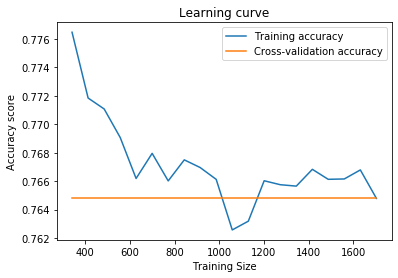

In [11]:
plot_model = svm.SVC(kernel='linear', C=0.001, gamma=0.0001)

train_sizes_seed100, train_scores_seed100, val_scores_seed100 = learning_curve(plot_model, 
                                                                X_train, 
                                                                y_train, 
                                                                cv=5, 
                                                                scoring='accuracy', 
                                                                n_jobs=-1, # 이거 바꾸고 싶으면 바꾸고  
                                                                train_sizes=np.linspace(0.2, 1, 20), 
                                                                verbose=2)


train_mean_seed100 = np.mean(train_scores_seed100, axis = 1)
train_std_seed100  = np.std(train_scores_seed100, axis=1)
val_mean_seed100   = np.mean(val_scores_seed100, axis=1)
val_std_seed100    = np.std(val_scores_seed100, axis=1)

plt.plot(train_sizes_seed100, train_mean_seed100, label='Training accuracy')
plt.plot(train_sizes_seed100, val_mean_seed100,   label='Cross-validation accuracy')
plt.title ('Learning curve')
plt.xlabel('Training Size')
plt.ylabel('Accuracy score')
plt.legend(loc='best')
plt.show()

## Seed == 1234

In [104]:
seed = 1234
X_train, X_test, y_train, y_test = train_test_split(X_t, y_t, test_size=0.3, random_state=seed)  
folds = KFold(n_splits = 5, shuffle = True, random_state=seed)

In [105]:
# svm_hyper_params = [ 
#                         {
#                         'gamma': np.logspace(-4, -1, 4),
#                         'C': np.logspace(-3, 1, 5),
#                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']
#                         }
#                     ]

# # specify model
# svm_model = svm.SVC()

# # set up GridSearchCV()
# svm_model_cv = GridSearchCV(estimator = svm_model, 
#                             param_grid = svm_hyper_params, 
#                             scoring= 'accuracy', 
#                             cv = folds, 
#                             verbose = 2,
#                             return_train_score=True,
#                             n_jobs=-1)     

# # fit the model
# svm_model_cv.fit(X_train, y_train)
# print("best hyper parameters", svm_model_cv.best_params_)
# svm_y_pred = svm_model_cv.predict(X_test)

# # accuracy 
# print("Accuracy:", metrics.accuracy_score(y_test, svm_y_pred))
# # f1 score 
# print("F1 score micro:", f1_score(y_test, svm_y_pred, average='micro'))
# print("F1 score binary:", f1_score(y_test, svm_y_pred, average='binary'))

# print("\nclassification report:\n", classification_report(y_test, svm_y_pred))

[learning_curve] Training set sizes: [ 340  412  484  556  627  699  771  843  914  986 1058 1130 1201 1273
 1345 1417 1488 1560 1632 1704]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  50 out of 100 | elapsed:    1.1s remaining:    1.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    2.2s finished


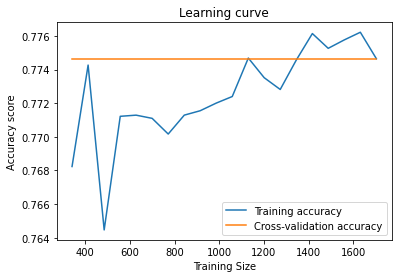

In [106]:
plot_model = svm.SVC(kernel='linear', C=0.001, gamma=0.0001)

train_sizes_seed1234, train_scores_seed1234, val_scores_seed1234 = learning_curve(plot_model, 
                                                                X_train, 
                                                                y_train, 
                                                                cv=5, 
                                                                scoring='accuracy', 
                                                                n_jobs=-1, # 이거 바꾸고 싶으면 바꾸고  
                                                                train_sizes=np.linspace(0.2, 1, 20), 
                                                                verbose=2)


train_mean_seed1234 = np.mean(train_scores_seed1234, axis = 1)
train_std_seed1234  = np.std(train_scores_seed1234, axis=1)
val_mean_seed1234   = np.mean(val_scores_seed1234, axis=1)
val_std_seed1234    = np.std(val_scores_seed1234, axis=1)

plt.plot(train_sizes_seed1234, train_mean_seed1234, label='Training accuracy')
plt.plot(train_sizes_seed1234, val_mean_seed1234,   label='Cross-validation accuracy')
plt.title ('Learning curve')
plt.xlabel('Training Size')
plt.ylabel('Accuracy score')
plt.legend(loc='best')
plt.show()

## Seed == 500

In [107]:
seed = 500
X_train, X_test, y_train, y_test = train_test_split(X_t, y_t, test_size=0.3, random_state=seed)  
folds = KFold(n_splits = 5, shuffle = True, random_state=seed)

In [108]:
# svm_hyper_params = [ 
#                         {
#                         'gamma': np.logspace(-4, -1, 4),
#                         'C': np.logspace(-3, 1, 5),
#                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']
#                         }
#                     ]

# # specify model
# svm_model = svm.SVC()

# # set up GridSearchCV()
# svm_model_cv = GridSearchCV(estimator = svm_model, 
#                             param_grid = svm_hyper_params, 
#                             scoring= 'accuracy', 
#                             cv = folds, 
#                             verbose = 2,
#                             return_train_score=True,
#                             n_jobs=-1)     

# # fit the model
# svm_model_cv.fit(X_train, y_train)
# print("best hyper parameters", svm_model_cv.best_params_)
# svm_y_pred = svm_model_cv.predict(X_test)

# # accuracy 
# print("Accuracy:", metrics.accuracy_score(y_test, svm_y_pred))
# # f1 score 
# print("F1 score micro:", f1_score(y_test, svm_y_pred, average='micro'))
# print("F1 score binary:", f1_score(y_test, svm_y_pred, average='binary'))

# print("\nclassification report:\n", classification_report(y_test, svm_y_pred))

[learning_curve] Training set sizes: [ 340  412  484  556  627  699  771  843  914  986 1058 1130 1201 1273
 1345 1417 1488 1560 1632 1704]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  50 out of 100 | elapsed:    6.3s remaining:    6.3s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   14.3s finished


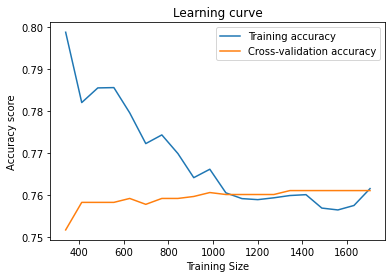

In [109]:
plot_model = svm.SVC(kernel='rbf', C=10.0, gamma=0.1)

train_sizes_seed500, train_scores_seed500, val_scores_seed500 = learning_curve(plot_model, 
                                                                X_train, 
                                                                y_train, 
                                                                cv=5, 
                                                                scoring='accuracy', 
                                                                n_jobs=-1, # 이거 바꾸고 싶으면 바꾸고  
                                                                train_sizes=np.linspace(0.2, 1, 20), 
                                                                verbose=2)


train_mean_seed500 = np.mean(train_scores_seed500, axis = 1)
train_std_seed500  = np.std(train_scores_seed500, axis=1)
val_mean_seed500   = np.mean(val_scores_seed500, axis=1)
val_std_seed500    = np.std(val_scores_seed500, axis=1)

plt.plot(train_sizes_seed500, train_mean_seed500, label='Training accuracy')
plt.plot(train_sizes_seed500, val_mean_seed500,   label='Cross-validation accuracy')
plt.title ('Learning curve')
plt.xlabel('Training Size')
plt.ylabel('Accuracy score')
plt.legend(loc='best')
plt.show()

In [110]:
# learning curve considering different seeds 

In [111]:
acc_avg = list()
acc_se  = list()

val_avg = list()
val_se  = list()

for i in range(len(train_sizes_seed100)):
    acc_avg.append(np.mean([train_mean_seed100[i], train_mean_seed500[i], train_mean_seed1234[i]]))
    acc_se .append(np.std ([train_mean_seed100[i], train_mean_seed500[i], train_mean_seed1234[i]]) / np.sqrt(3))
    
    val_avg.append(np.mean([val_mean_seed100[i], val_mean_seed500[i], val_mean_seed1234[i]]))
    val_se .append(np.std ([val_mean_seed100[i], val_mean_seed500[i], val_mean_seed1234[i]]) / np.sqrt(3))

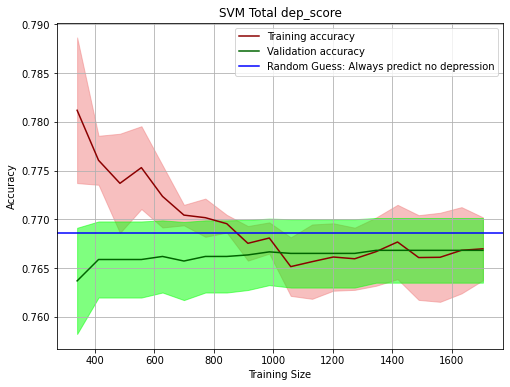

In [112]:
fig, ax = plt.subplots(figsize=(8, 6))

ax.plot(train_sizes_seed100, acc_avg, c='darkred', label='Training accuracy')
ax.fill_between(train_sizes_seed100, np.subtract(acc_avg, acc_se), np.add(acc_avg, acc_se), color='lightcoral', alpha=0.5)

ax.plot(train_sizes_seed100, val_avg, c='darkgreen', label='Validation accuracy')
ax.fill_between(train_sizes_seed100, np.subtract(val_avg, val_se), np.add(val_avg, val_se), color='lime', alpha=0.5)

ax.set_xlabel('Training Size')
ax.set_ylabel('Accuracy')
ax.set_title('SVM Total dep_score')
ax.axhline(y=0.7686, color='blue', linestyle='-', label='Random Guess: Always predict no depression')
ax.legend()
ax.grid()

training 과 validation curve 가 converge 는 하는데 에러가 매우 높은것으로 보아, 모델이 잘못 되었거나 애초에 screen time 과 mental health 가 연관이 없을 수도 있음. validation curve 가 거의 움직이지 않는것을 보니 learning 이 제대로 이루어 지지 않고 있음.

## Logistic Regression

## Seed 100

In [113]:
seed = 100
X_train, X_test, y_train, y_test = train_test_split(X_t, y_t, test_size=0.3, random_state=seed)  
folds = KFold(n_splits = 5, shuffle = True, random_state=seed)

In [114]:
# log_hyper_params = [ 
#                         {
#                         'C': np.logspace(-4, 2, 7),
#                         'solver' : ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
#                         'penalty' : ['l1', 'l2', 'elasticnet', 'none'],
#                         'multi_class' : ['auto', 'ovr', 'multinomial']
#                         }
#                     ]

# # specify model
# log_model = LogisticRegression()

# # set up GridSearchCV()
# log_model_cv = GridSearchCV(estimator = log_model, 
#                             param_grid = log_hyper_params, 
#                             scoring= 'accuracy', 
#                             cv = folds, 
#                             verbose = 2,
#                             return_train_score=True,
#                             n_jobs=-1)      

# # fit the model
# log_model_cv.fit(X_train, y_train)
# print("best hyper parameters", log_model_cv.best_params_)
# log_y_pred = log_model_cv.predict(X_test)

# # accuracy 
# print("Accuracy:", metrics.accuracy_score(y_test, log_y_pred))
# # f1 score 
# print("F1 score micro:", f1_score(y_test, log_y_pred, average='micro'))
# print("F1 score binary:", f1_score(y_test, log_y_pred, average='binary'))

# print("\nclassification report:\n", classification_report(y_test, log_y_pred))

[learning_curve] Training set sizes: [ 340  412  484  556  627  699  771  843  914  986 1058 1130 1201 1273
 1345 1417 1488 1560 1632 1704]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  50 out of 100 | elapsed:    0.4s remaining:    0.4s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.8s finished


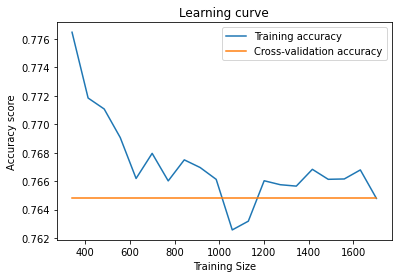

In [115]:
# ------ HERE ------

# plug in suitable hyper-parameters


# 여기만 바꾸면 된다. 
plot_model = LogisticRegression(C=0.0001, multi_class='auto', penalty='l1', solver='liblinear')

train_sizes_seed100, train_scores_seed100, val_scores_seed100 = learning_curve(plot_model, 
                                                                X_train, 
                                                                y_train, 
                                                                cv=5, 
                                                                scoring='accuracy', 
                                                                n_jobs=-1, # 이거 바꾸고 싶으면 바꾸고  
                                                                train_sizes=np.linspace(0.2, 1, 20), 
                                                                verbose=2)


train_mean_seed100 = np.mean(train_scores_seed100, axis = 1)
train_std_seed100  = np.std(train_scores_seed100, axis=1)
val_mean_seed100   = np.mean(val_scores_seed100, axis=1)
val_std_seed100    = np.std(val_scores_seed100, axis=1)

plt.plot(train_sizes_seed100, train_mean_seed100, label='Training accuracy')
plt.plot(train_sizes_seed100, val_mean_seed100,   label='Cross-validation accuracy')
plt.title ('Learning curve')
plt.xlabel('Training Size')
plt.ylabel('Accuracy score')
plt.legend(loc='best')
plt.show()

## Seed 1234

In [116]:
seed = 1234
X_train, X_test, y_train, y_test = train_test_split(X_t, y_t, test_size=0.3, random_state=seed)  
folds = KFold(n_splits = 5, shuffle = True, random_state=seed)

In [117]:
# log_hyper_params = [ 
#                         {
#                         'C': np.logspace(-4, 2, 7),
#                         'solver' : ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
#                         'penalty' : ['l1', 'l2', 'elasticnet', 'none'],
#                         'multi_class' : ['auto', 'ovr', 'multinomial']
#                         }
#                     ]

# # specify model
# log_model = LogisticRegression()

# # set up GridSearchCV()
# log_model_cv = GridSearchCV(estimator = log_model, 
#                             param_grid = log_hyper_params, 
#                             scoring= 'accuracy', 
#                             cv = folds, 
#                             verbose = 2,
#                             return_train_score=True,
#                             n_jobs=-1)      

# # fit the model
# log_model_cv.fit(X_train, y_train)
# print("best hyper parameters", log_model_cv.best_params_)
# log_y_pred = log_model_cv.predict(X_test)

# # accuracy 
# print("Accuracy:", metrics.accuracy_score(y_test, log_y_pred))
# # f1 score 
# print("F1 score micro:", f1_score(y_test, log_y_pred, average='micro'))
# print("F1 score binary:", f1_score(y_test, log_y_pred, average='binary'))

# print("\nclassification report:\n", classification_report(y_test, log_y_pred))

[learning_curve] Training set sizes: [ 340  412  484  556  627  699  771  843  914  986 1058 1130 1201 1273
 1345 1417 1488 1560 1632 1704]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  50 out of 100 | elapsed:    0.4s remaining:    0.4s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.7s finished


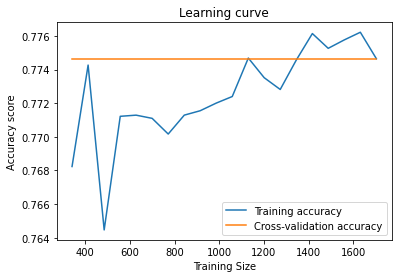

In [118]:
plot_model = LogisticRegression(C=0.0001, multi_class='auto', penalty='l1', solver='liblinear')

train_sizes_seed1234, train_scores_seed1234, val_scores_seed1234 = learning_curve(plot_model, 
                                                                X_train, 
                                                                y_train, 
                                                                cv=5, 
                                                                scoring='accuracy', 
                                                                n_jobs=-1, # 이거 바꾸고 싶으면 바꾸고  
                                                                train_sizes=np.linspace(0.2, 1, 20), 
                                                                verbose=2)


train_mean_seed1234 = np.mean(train_scores_seed1234, axis = 1)
train_std_seed1234  = np.std(train_scores_seed1234, axis=1)
val_mean_seed1234   = np.mean(val_scores_seed1234, axis=1)
val_std_seed1234    = np.std(val_scores_seed1234, axis=1)

plt.plot(train_sizes_seed1234, train_mean_seed1234, label='Training accuracy')
plt.plot(train_sizes_seed1234, val_mean_seed1234,   label='Cross-validation accuracy')
plt.title ('Learning curve')
plt.xlabel('Training Size')
plt.ylabel('Accuracy score')
plt.legend(loc='best')
plt.show()

## Seed 500

In [119]:
seed = 500
X_train, X_test, y_train, y_test = train_test_split(X_t, y_t, test_size=0.3, random_state=seed)  
folds = KFold(n_splits = 5, shuffle = True, random_state=seed)

In [120]:
# log_hyper_params = [ 
#                         {
#                         'C': np.logspace(-4, 2, 7),
#                         'solver' : ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
#                         'penalty' : ['l1', 'l2', 'elasticnet', 'none'],
#                         'multi_class' : ['auto', 'ovr', 'multinomial']
#                         }
#                     ]

# # specify model
# log_model = LogisticRegression()

# # set up GridSearchCV()
# log_model_cv = GridSearchCV(estimator = log_model, 
#                             param_grid = log_hyper_params, 
#                             scoring= 'accuracy', 
#                             cv = folds, 
#                             verbose = 2,
#                             return_train_score=True,
#                             n_jobs=-1)      

# # fit the model
# log_model_cv.fit(X_train, y_train)
# print("best hyper parameters", log_model_cv.best_params_)
# log_y_pred = log_model_cv.predict(X_test)

# # accuracy 
# print("Accuracy:", metrics.accuracy_score(y_test, log_y_pred))
# # f1 score 
# print("F1 score micro:", f1_score(y_test, log_y_pred, average='micro'))
# print("F1 score binary:", f1_score(y_test, log_y_pred, average='binary'))

# print("\nclassification report:\n", classification_report(y_test, log_y_pred))

[learning_curve] Training set sizes: [ 340  412  484  556  627  699  771  843  914  986 1058 1130 1201 1273
 1345 1417 1488 1560 1632 1704]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  50 out of 100 | elapsed:    0.4s remaining:    0.4s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.7s finished


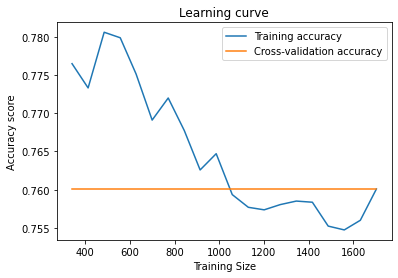

In [121]:
plot_model = LogisticRegression(C=0.0001, multi_class='auto', penalty='l1', solver='liblinear')

train_sizes_seed500, train_scores_seed500, val_scores_seed500 = learning_curve(plot_model, 
                                                                X_train, 
                                                                y_train, 
                                                                cv=5, 
                                                                scoring='accuracy', 
                                                                n_jobs=-1, # 이거 바꾸고 싶으면 바꾸고  
                                                                train_sizes=np.linspace(0.2, 1, 20), 
                                                                verbose=2)


train_mean_seed500 = np.mean(train_scores_seed500, axis = 1)
train_std_seed500  = np.std(train_scores_seed500, axis=1)
val_mean_seed500   = np.mean(val_scores_seed500, axis=1)
val_std_seed500    = np.std(val_scores_seed500, axis=1)

plt.plot(train_sizes_seed500, train_mean_seed500, label='Training accuracy')
plt.plot(train_sizes_seed500, val_mean_seed500,   label='Cross-validation accuracy')
plt.title ('Learning curve')
plt.xlabel('Training Size')
plt.ylabel('Accuracy score')
plt.legend(loc='best')
plt.show()

In [122]:
# learning curve considering different seeds 

In [123]:
acc_avg = list()
acc_se  = list()

val_avg = list()
val_se  = list()

for i in range(len(train_sizes_seed100)):
    acc_avg.append(np.mean([train_mean_seed100[i], train_mean_seed500[i], train_mean_seed1234[i]]))
    acc_se .append(np.std ([train_mean_seed100[i], train_mean_seed500[i], train_mean_seed1234[i]]) / np.sqrt(3))
    
    val_avg.append(np.mean([val_mean_seed100[i], val_mean_seed500[i], val_mean_seed1234[i]]))
    val_se .append(np.std ([val_mean_seed100[i], val_mean_seed500[i], val_mean_seed1234[i]]) / np.sqrt(3))

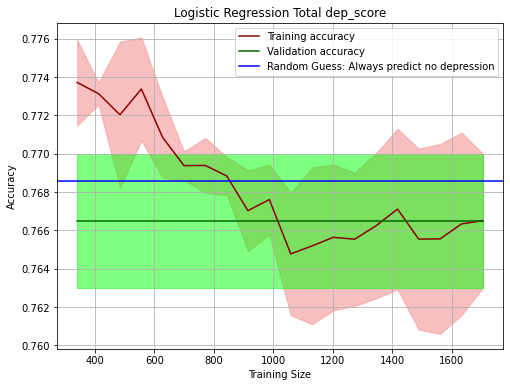

In [124]:
fig, ax = plt.subplots(figsize=(8, 6))

ax.plot(train_sizes_seed100, acc_avg, c='darkred', label='Training accuracy')
ax.fill_between(train_sizes_seed100, np.subtract(acc_avg, acc_se), np.add(acc_avg, acc_se), color='lightcoral', alpha=0.5)

ax.plot(train_sizes_seed100, val_avg, c='darkgreen', label='Validation accuracy')
ax.fill_between(train_sizes_seed100, np.subtract(val_avg, val_se), np.add(val_avg, val_se), color='lime', alpha=0.5)

ax.set_xlabel('Training Size')
ax.set_ylabel('Accuracy')
ax.set_title('Logistic Regression Total dep_score')
ax.axhline(y=0.7686, color='blue', linestyle='-', label='Random Guess: Always predict no depression')
ax.legend()
ax.grid()

training 과 validation curve 가 converge 는 하는데 에러가 매우 높은것으로 보아, 모델이 잘못 되었거나 애초에 screen time 과 mental health 가 연관이 없을 수도 있음. validation curve 가 거의 움직이지 않는것을 보니 learning 이 제대로 이루어 지지 않고 있음.

## KNN

## Seed 100

In [125]:
seed = 100
X_train, X_test, y_train, y_test = train_test_split(X_t, y_t, test_size=0.3, random_state=seed)  
folds = KFold(n_splits = 5, shuffle = True, random_state=seed)

In [126]:
# knn_hyper_params = [ 
#                         {
#                         'weights' : ['uniform', 'distance'],
#                         'algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute'],
#                         'leaf_size' : np.linspace(2, 100, 10, dtype=int),
#                         'n_neighbors' : [int(x) for x in np.linspace(2, 50, 10)]
#                         }
#                     ]

# # specify model

# # THIS SECTION SHOULD BE CHANGED.
# # n_neighbors  SHOULD BE MODIFIED TO ANOTHER VALUE DEPENDING ON THE TARGET VALUE.
# knn_model = KNeighborsClassifier()

# # set up GridSearchCV()
# knn_model_cv = GridSearchCV(estimator = knn_model, 
#                             param_grid = knn_hyper_params, 
#                             scoring= 'accuracy', 
#                             cv = folds, 
#                             verbose = 2,
#                             return_train_score=True,
#                             n_jobs=-1)

# # fit the model
# knn_model_cv.fit(X_train, y_train)
# print("best hyper parameters", knn_model_cv.best_params_)
# knn_y_pred = knn_model_cv.predict(X_test)

# # accuracy 
# print("Accuracy:", metrics.accuracy_score(y_test, knn_y_pred))
# # f1 score 
# print("F1 score micro:", f1_score(y_test, knn_y_pred, average='micro'))
# print("F1 score binary:", f1_score(y_test, knn_y_pred, average='binary'))

# print("\nclassification report:\n", classification_report(y_test, knn_y_pred))

[learning_curve] Training set sizes: [ 340  412  484  556  627  699  771  843  914  986 1058 1130 1201 1273
 1345 1417 1488 1560 1632 1704]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  50 out of 100 | elapsed:    3.5s remaining:    3.5s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    7.7s finished


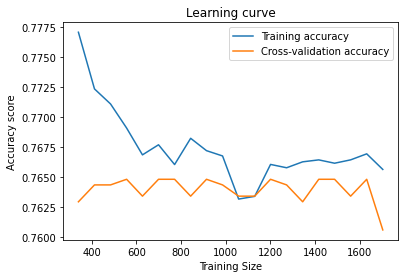

In [127]:
# ------ HERE ------

# plug in suitable hyper-parameters


# 여기만 바꾸면 된다. 
plot_model = KNeighborsClassifier(algorithm='ball_tree', leaf_size=2, weights='uniform', n_neighbors=18)

train_sizes_seed100, train_scores_seed100, val_scores_seed100 = learning_curve(plot_model, 
                                                                X_train, 
                                                                y_train, 
                                                                cv=5, 
                                                                scoring='accuracy', 
                                                                n_jobs=-1, # 이거 바꾸고 싶으면 바꾸고  
                                                                train_sizes=np.linspace(0.2, 1, 20), 
                                                                verbose=2)


train_mean_seed100 = np.mean(train_scores_seed100, axis = 1)
train_std_seed100  = np.std(train_scores_seed100, axis=1)
val_mean_seed100   = np.mean(val_scores_seed100, axis=1)
val_std_seed100    = np.std(val_scores_seed100, axis=1)

plt.plot(train_sizes_seed100, train_mean_seed100, label='Training accuracy')
plt.plot(train_sizes_seed100, val_mean_seed100,   label='Cross-validation accuracy')
plt.title ('Learning curve')
plt.xlabel('Training Size')
plt.ylabel('Accuracy score')
plt.legend(loc='best')
plt.show()

## Seed 1234

In [128]:
seed = 1234
X_train, X_test, y_train, y_test = train_test_split(X_t, y_t, test_size=0.3, random_state=seed)  
folds = KFold(n_splits = 5, shuffle = True, random_state=seed)

In [129]:
# knn_hyper_params = [ 
#                         {
#                         'weights' : ['uniform', 'distance'],
#                         'algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute'],
#                         'leaf_size' : np.linspace(2, 100, 10, dtype=int),
#                         'n_neighbors' : [int(x) for x in np.linspace(2, 50, 10)]
#                         }
#                     ]

# # specify model

# # THIS SECTION SHOULD BE CHANGED.
# # n_neighbors  SHOULD BE MODIFIED TO ANOTHER VALUE DEPENDING ON THE TARGET VALUE.
# knn_model = KNeighborsClassifier()

# # set up GridSearchCV()
# knn_model_cv = GridSearchCV(estimator = knn_model, 
#                             param_grid = knn_hyper_params, 
#                             scoring= 'accuracy', 
#                             cv = folds, 
#                             verbose = 2,
#                             return_train_score=True,
#                             n_jobs=-1)

# # fit the model
# knn_model_cv.fit(X_train, y_train)
# print("best hyper parameters", knn_model_cv.best_params_)
# knn_y_pred = knn_model_cv.predict(X_test)

# # accuracy 
# print("Accuracy:", metrics.accuracy_score(y_test, knn_y_pred))
# # f1 score 
# print("F1 score micro:", f1_score(y_test, knn_y_pred, average='micro'))
# print("F1 score binary:", f1_score(y_test, knn_y_pred, average='binary'))

# print("\nclassification report:\n", classification_report(y_test, knn_y_pred))

[learning_curve] Training set sizes: [ 340  412  484  556  627  699  771  843  914  986 1058 1130 1201 1273
 1345 1417 1488 1560 1632 1704]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  50 out of 100 | elapsed:    4.0s remaining:    4.0s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    8.4s finished


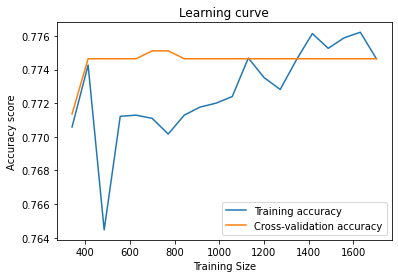

In [130]:
plot_model = KNeighborsClassifier(algorithm='ball_tree', leaf_size=2, weights='uniform', n_neighbors=39)

train_sizes_seed1234, train_scores_seed1234, val_scores_seed1234 = learning_curve(plot_model, 
                                                                X_train, 
                                                                y_train, 
                                                                cv=5, 
                                                                scoring='accuracy', 
                                                                n_jobs=-1, # 이거 바꾸고 싶으면 바꾸고  
                                                                train_sizes=np.linspace(0.2, 1, 20), 
                                                                verbose=2)


train_mean_seed1234 = np.mean(train_scores_seed1234, axis = 1)
train_std_seed1234  = np.std(train_scores_seed1234, axis=1)
val_mean_seed1234   = np.mean(val_scores_seed1234, axis=1)
val_std_seed1234    = np.std(val_scores_seed1234, axis=1)

plt.plot(train_sizes_seed1234, train_mean_seed1234, label='Training accuracy')
plt.plot(train_sizes_seed1234, val_mean_seed1234,   label='Cross-validation accuracy')
plt.title ('Learning curve')
plt.xlabel('Training Size')
plt.ylabel('Accuracy score')
plt.legend(loc='best')
plt.show()

## Seed 500

In [131]:
seed = 500
X_train, X_test, y_train, y_test = train_test_split(X_t, y_t, test_size=0.3, random_state=seed)  
folds = KFold(n_splits = 5, shuffle = True, random_state=seed)

In [132]:
# knn_hyper_params = [ 
#                         {
#                         'weights' : ['uniform', 'distance'],
#                         'algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute'],
#                         'leaf_size' : np.linspace(2, 100, 10, dtype=int),
#                         'n_neighbors' : [int(x) for x in np.linspace(2, 50, 10)]
#                         }
#                     ]

# # specify model

# # THIS SECTION SHOULD BE CHANGED.
# # n_neighbors  SHOULD BE MODIFIED TO ANOTHER VALUE DEPENDING ON THE TARGET VALUE.
# knn_model = KNeighborsClassifier()

# # set up GridSearchCV()
# knn_model_cv = GridSearchCV(estimator = knn_model, 
#                             param_grid = knn_hyper_params, 
#                             scoring= 'accuracy', 
#                             cv = folds, 
#                             verbose = 2,
#                             return_train_score=True,
#                             n_jobs=-1)

# # fit the model
# knn_model_cv.fit(X_train, y_train)
# print("best hyper parameters", knn_model_cv.best_params_)
# knn_y_pred = knn_model_cv.predict(X_test)

# # accuracy 
# print("Accuracy:", metrics.accuracy_score(y_test, knn_y_pred))
# # f1 score 
# print("F1 score micro:", f1_score(y_test, knn_y_pred, average='micro'))
# print("F1 score binary:", f1_score(y_test, knn_y_pred, average='binary'))

# print("\nclassification report:\n", classification_report(y_test, knn_y_pred))

[learning_curve] Training set sizes: [ 340  412  484  556  627  699  771  843  914  986 1058 1130 1201 1273
 1345 1417 1488 1560 1632 1704]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  50 out of 100 | elapsed:    3.6s remaining:    3.6s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    7.3s finished


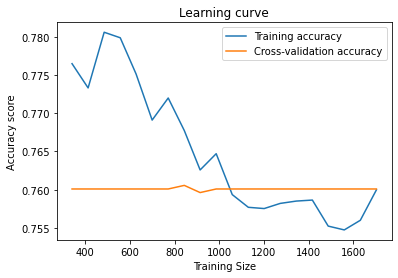

In [133]:
plot_model = KNeighborsClassifier(algorithm='auto', leaf_size=12, weights='uniform', n_neighbors=34)

train_sizes_seed500, train_scores_seed500, val_scores_seed500 = learning_curve(plot_model, 
                                                                X_train, 
                                                                y_train, 
                                                                cv=5, 
                                                                scoring='accuracy', 
                                                                n_jobs=-1, # 이거 바꾸고 싶으면 바꾸고  
                                                                train_sizes=np.linspace(0.2, 1, 20), 
                                                                verbose=2)


train_mean_seed500 = np.mean(train_scores_seed500, axis = 1)
train_std_seed500  = np.std(train_scores_seed500, axis=1)
val_mean_seed500   = np.mean(val_scores_seed500, axis=1)
val_std_seed500    = np.std(val_scores_seed500, axis=1)

plt.plot(train_sizes_seed500, train_mean_seed500, label='Training accuracy')
plt.plot(train_sizes_seed500, val_mean_seed500,   label='Cross-validation accuracy')
plt.title ('Learning curve')
plt.xlabel('Training Size')
plt.ylabel('Accuracy score')
plt.legend(loc='best')
plt.show()

In [134]:
# learning curve considering different seeds 

In [135]:
acc_avg = list()
acc_se  = list()

val_avg = list()
val_se  = list()

for i in range(len(train_sizes_seed100)):
    acc_avg.append(np.mean([train_mean_seed100[i], train_mean_seed500[i], train_mean_seed1234[i]]))
    acc_se .append(np.std ([train_mean_seed100[i], train_mean_seed500[i], train_mean_seed1234[i]]) / np.sqrt(3))
    
    val_avg.append(np.mean([val_mean_seed100[i], val_mean_seed500[i], val_mean_seed1234[i]]))
    val_se .append(np.std ([val_mean_seed100[i], val_mean_seed500[i], val_mean_seed1234[i]]) / np.sqrt(3))

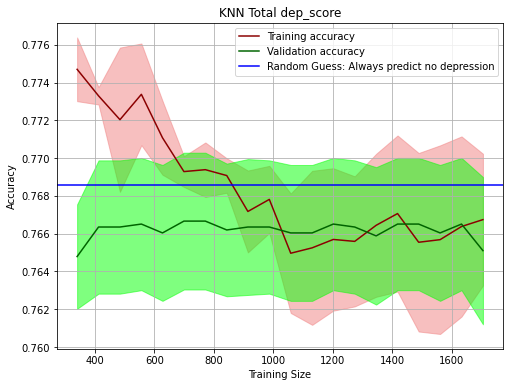

In [137]:
fig, ax = plt.subplots(figsize=(8, 6))

ax.plot(train_sizes_seed100, acc_avg, c='darkred', label='Training accuracy')
ax.fill_between(train_sizes_seed100, np.subtract(acc_avg, acc_se), np.add(acc_avg, acc_se), color='lightcoral', alpha=0.5)

ax.plot(train_sizes_seed100, val_avg, c='darkgreen', label='Validation accuracy')
ax.fill_between(train_sizes_seed100, np.subtract(val_avg, val_se), np.add(val_avg, val_se), color='lime', alpha=0.5)

ax.set_xlabel('Training Size')
ax.set_ylabel('Accuracy')
ax.set_title('KNN Total dep_score')
ax.axhline(y=0.7686, color='blue', linestyle='-', label='Random Guess: Always predict no depression')
ax.legend()
ax.grid()

Kor:

training 과 validation curve 가 converge 는 하는데 에러가 매우 높은것으로 보아, 모델이 잘못 되었거나 애초에 screen time 과 mental health 가 연관이 없을 수도 있음. validation curve 가 거의 움직이지 않는것을 보니 learning 이 제대로 이루어 지지 않고 있음.

Eng:

Although training and validation curve converge, the error is quite high (error = 100 - accuracy). This indicates that the model is wrong or maybe there is no relationship between screen time and mental health. By looking at the validation curve, it is obvious that the learning is not working well. i.e. vaidation curve does not move

## Random Forest

## Seed 100

In [138]:
seed = 100
X_train, X_test, y_train, y_test = train_test_split(X_t, y_t, test_size=0.3, random_state=seed)  
folds = KFold(n_splits = 5, shuffle = True, random_state=seed)

In [139]:
# rf_hyper_params = [ 
#                         {
#                             'n_estimators' : [int(x) for x in np.linspace(5, 50, 5)],
#                             'criterion' : ['gini', 'entropy'],
#                             'max_depth' : [int(x) for x in np.linspace(2, 50, 5)],
#                             'min_samples_split' : [int(x) for x in np.linspace(2, 50, 5)],
#                             'min_samples_leaf' : [int(x) for x in np.linspace(2, 50, 5)],
#                             'max_features' : ['auto', 'sqrt', 'log2'],
#                             'bootstrap' : [True, False]

#                         }
#                     ]

# # specify model

# # THIS SECTION SHOULD BE CHANGED.
# # n_neighbors  SHOULD BE MODIFIED TO ANOTHER VALUE DEPENDING ON THE TARGET VALUE.
# rf_model = RandomForestClassifier()

# # set up GridSearchCV()
# rf_model_cv = GridSearchCV(estimator = rf_model, 
#                             param_grid = rf_hyper_params, 
#                             scoring= 'accuracy', 
#                             cv = folds, 
#                             verbose = 2,
#                             return_train_score=True,
#                             n_jobs=-1)    

# # fit the model
# rf_model_cv.fit(X_train, y_train)
# print("best hyper parameters", rf_model_cv.best_params_)
# rf_y_pred = rf_model_cv.predict(X_test)

# # accuracy 
# print("Accuracy:", metrics.accuracy_score(y_test, rf_y_pred))
# # f1 score 
# print("F1 score micro:", f1_score(y_test, rf_y_pred, average='micro'))
# print("F1 score binary:", f1_score(y_test, rf_y_pred, average='binary'))

# print("\nclassification report:\n", classification_report(y_test, rf_y_pred))

[learning_curve] Training set sizes: [ 340  412  484  556  627  699  771  843  914  986 1058 1130 1201 1273
 1345 1417 1488 1560 1632 1704]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  50 out of 100 | elapsed:    0.9s remaining:    0.9s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    1.7s finished


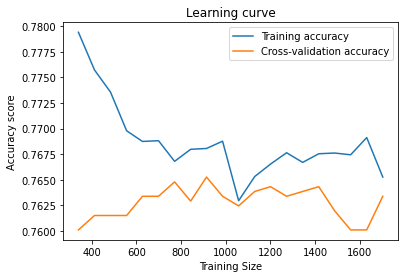

In [140]:
# ------ HERE ------

# plug in suitable hyper-parameters


# 여기만 바꾸면 된다. 
plot_model = RandomForestClassifier(bootstrap=True, criterion='entropy', max_depth=50, max_features='sqrt', min_samples_leaf=2, min_samples_split=38, n_estimators=5)

train_sizes_seed100, train_scores_seed100, val_scores_seed100 = learning_curve(plot_model, 
                                                                X_train, 
                                                                y_train, 
                                                                cv=5, 
                                                                scoring='accuracy', 
                                                                n_jobs=-1, # 이거 바꾸고 싶으면 바꾸고  
                                                                train_sizes=np.linspace(0.2, 1, 20), 
                                                                verbose=2)


train_mean_seed100 = np.mean(train_scores_seed100, axis = 1)
train_std_seed100  = np.std(train_scores_seed100, axis=1)
val_mean_seed100   = np.mean(val_scores_seed100, axis=1)
val_std_seed100    = np.std(val_scores_seed100, axis=1)

plt.plot(train_sizes_seed100, train_mean_seed100, label='Training accuracy')
plt.plot(train_sizes_seed100, val_mean_seed100,   label='Cross-validation accuracy')
plt.title ('Learning curve')
plt.xlabel('Training Size')
plt.ylabel('Accuracy score')
plt.legend(loc='best')
plt.show()

## Seed 1234

In [141]:
seed = 1234
X_train, X_test, y_train, y_test = train_test_split(X_t, y_t, test_size=0.3, random_state=seed)  
folds = KFold(n_splits = 5, shuffle = True, random_state=seed)

In [142]:
# rf_hyper_params = [ 
#                         {
#                             'n_estimators' : [int(x) for x in np.linspace(5, 50, 5)],
#                             'criterion' : ['gini', 'entropy'],
#                             'max_depth' : [int(x) for x in np.linspace(2, 50, 5)],
#                             'min_samples_split' : [int(x) for x in np.linspace(2, 50, 5)],
#                             'min_samples_leaf' : [int(x) for x in np.linspace(2, 50, 5)],
#                             'max_features' : ['auto', 'sqrt', 'log2'],
#                             'bootstrap' : [True, False]

#                         }
#                     ]

# # specify model

# # THIS SECTION SHOULD BE CHANGED.
# # n_neighbors  SHOULD BE MODIFIED TO ANOTHER VALUE DEPENDING ON THE TARGET VALUE.
# rf_model = RandomForestClassifier()

# # set up GridSearchCV()
# rf_model_cv = GridSearchCV(estimator = rf_model, 
#                             param_grid = rf_hyper_params, 
#                             scoring= 'accuracy', 
#                             cv = folds, 
#                             verbose = 2,
#                             return_train_score=True,
#                             n_jobs=-1)    

# # fit the model
# rf_model_cv.fit(X_train, y_train)
# print("best hyper parameters", rf_model_cv.best_params_)
# rf_y_pred = rf_model_cv.predict(X_test)

# # accuracy 
# print("Accuracy:", metrics.accuracy_score(y_test, rf_y_pred))
# # f1 score 
# print("F1 score micro:", f1_score(y_test, rf_y_pred, average='micro'))
# print("F1 score binary:", f1_score(y_test, rf_y_pred, average='binary'))

# print("\nclassification report:\n", classification_report(y_test, rf_y_pred))

[learning_curve] Training set sizes: [ 340  412  484  556  627  699  771  843  914  986 1058 1130 1201 1273
 1345 1417 1488 1560 1632 1704]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  50 out of 100 | elapsed:    3.7s remaining:    3.7s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    7.2s finished


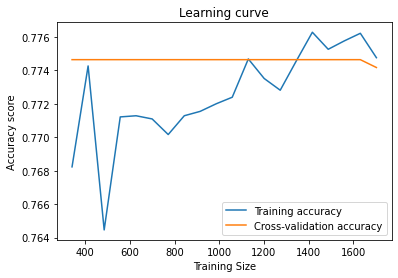

In [143]:
plot_model = RandomForestClassifier(bootstrap=True, criterion='gini', max_depth=14, max_features='log2', min_samples_leaf=2, min_samples_split=38, n_estimators=38)

train_sizes_seed1234, train_scores_seed1234, val_scores_seed1234 = learning_curve(plot_model, 
                                                                X_train, 
                                                                y_train, 
                                                                cv=5, 
                                                                scoring='accuracy', 
                                                                n_jobs=-1, # 이거 바꾸고 싶으면 바꾸고  
                                                                train_sizes=np.linspace(0.2, 1, 20), 
                                                                verbose=2)


train_mean_seed1234 = np.mean(train_scores_seed1234, axis = 1)
train_std_seed1234  = np.std(train_scores_seed1234, axis=1)
val_mean_seed1234   = np.mean(val_scores_seed1234, axis=1)
val_std_seed1234    = np.std(val_scores_seed1234, axis=1)

plt.plot(train_sizes_seed1234, train_mean_seed1234, label='Training accuracy')
plt.plot(train_sizes_seed1234, val_mean_seed1234,   label='Cross-validation accuracy')
plt.title ('Learning curve')
plt.xlabel('Training Size')
plt.ylabel('Accuracy score')
plt.legend(loc='best')
plt.show()

## Seed 500

In [144]:
seed = 500
X_train, X_test, y_train, y_test = train_test_split(X_t, y_t, test_size=0.3, random_state=seed)  
folds = KFold(n_splits = 5, shuffle = True, random_state=seed)

In [145]:
# rf_hyper_params = [ 
#                         {
#                             'n_estimators' : [int(x) for x in np.linspace(5, 50, 5)],
#                             'criterion' : ['gini', 'entropy'],
#                             'max_depth' : [int(x) for x in np.linspace(2, 50, 5)],
#                             'min_samples_split' : [int(x) for x in np.linspace(2, 50, 5)],
#                             'min_samples_leaf' : [int(x) for x in np.linspace(2, 50, 5)],
#                             'max_features' : ['auto', 'sqrt', 'log2'],
#                             'bootstrap' : [True, False]

#                         }
#                     ]

# # specify model

# # THIS SECTION SHOULD BE CHANGED.
# # n_neighbors  SHOULD BE MODIFIED TO ANOTHER VALUE DEPENDING ON THE TARGET VALUE.
# rf_model = RandomForestClassifier()

# # set up GridSearchCV()
# rf_model_cv = GridSearchCV(estimator = rf_model, 
#                             param_grid = rf_hyper_params, 
#                             scoring= 'accuracy', 
#                             cv = folds, 
#                             verbose = 2,
#                             return_train_score=True,
#                             n_jobs=-1)    

# # fit the model
# rf_model_cv.fit(X_train, y_train)
# print("best hyper parameters", rf_model_cv.best_params_)
# rf_y_pred = rf_model_cv.predict(X_test)

# # accuracy 
# print("Accuracy:", metrics.accuracy_score(y_test, rf_y_pred))
# # f1 score 
# print("F1 score micro:", f1_score(y_test, rf_y_pred, average='micro'))
# print("F1 score binary:", f1_score(y_test, rf_y_pred, average='binary'))

# print("\nclassification report:\n", classification_report(y_test, rf_y_pred))

[learning_curve] Training set sizes: [ 340  412  484  556  627  699  771  843  914  986 1058 1130 1201 1273
 1345 1417 1488 1560 1632 1704]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  50 out of 100 | elapsed:    1.8s remaining:    1.8s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    3.5s finished


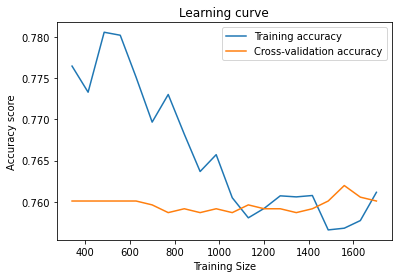

In [146]:
plot_model = RandomForestClassifier(bootstrap=True, criterion='gini', max_depth=50, max_features='auto', min_samples_leaf=2, min_samples_split=38, n_estimators=16)

train_sizes_seed500, train_scores_seed500, val_scores_seed500 = learning_curve(plot_model, 
                                                                X_train, 
                                                                y_train, 
                                                                cv=5, 
                                                                scoring='accuracy', 
                                                                n_jobs=-1, # 이거 바꾸고 싶으면 바꾸고  
                                                                train_sizes=np.linspace(0.2, 1, 20), 
                                                                verbose=2)


train_mean_seed500 = np.mean(train_scores_seed500, axis = 1)
train_std_seed500  = np.std(train_scores_seed500, axis=1)
val_mean_seed500   = np.mean(val_scores_seed500, axis=1)
val_std_seed500    = np.std(val_scores_seed500, axis=1)

plt.plot(train_sizes_seed500, train_mean_seed500, label='Training accuracy')
plt.plot(train_sizes_seed500, val_mean_seed500,   label='Cross-validation accuracy')
plt.title ('Learning curve')
plt.xlabel('Training Size')
plt.ylabel('Accuracy score')
plt.legend(loc='best')
plt.show()

In [147]:
# learning curve considering different seeds 

In [148]:
acc_avg = list()
acc_se  = list()

val_avg = list()
val_se  = list()

for i in range(len(train_sizes_seed100)):
    acc_avg.append(np.mean([train_mean_seed100[i], train_mean_seed500[i], train_mean_seed1234[i]]))
    acc_se .append(np.std ([train_mean_seed100[i], train_mean_seed500[i], train_mean_seed1234[i]]) / np.sqrt(3))
    
    val_avg.append(np.mean([val_mean_seed100[i], val_mean_seed500[i], val_mean_seed1234[i]]))
    val_se .append(np.std ([val_mean_seed100[i], val_mean_seed500[i], val_mean_seed1234[i]]) / np.sqrt(3))

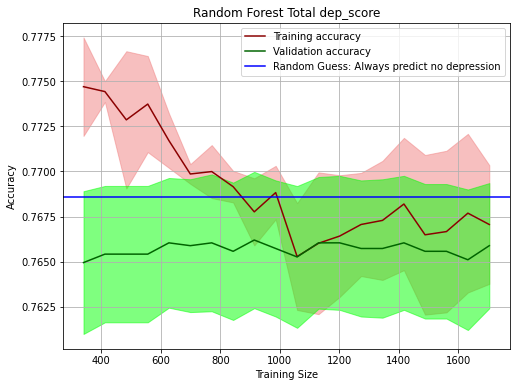

In [149]:
fig, ax = plt.subplots(figsize=(8, 6))

ax.plot(train_sizes_seed100, acc_avg, c='darkred', label='Training accuracy')
ax.fill_between(train_sizes_seed100, np.subtract(acc_avg, acc_se), np.add(acc_avg, acc_se), color='lightcoral', alpha=0.5)

ax.plot(train_sizes_seed100, val_avg, c='darkgreen', label='Validation accuracy')
ax.fill_between(train_sizes_seed100, np.subtract(val_avg, val_se), np.add(val_avg, val_se), color='lime', alpha=0.5)

ax.set_xlabel('Training Size')
ax.set_ylabel('Accuracy')
ax.set_title('Random Forest Total dep_score')
ax.axhline(y=0.7686, color='blue', linestyle='-', label='Random Guess: Always predict no depression')
ax.legend()
ax.grid()

Although training and validation curve converge, the error is quite high (error = 100 - accuracy). This indicates that the model is wrong or maybe there is no relationship between screen time and mental health. By looking at the validation curve, it is obvious that the learning is not working well. i.e. vaidation curve does not move

# 2. sampled

# SVM 

## Seed 100

In [150]:
seed = 100
X_train, X_test, y_train, y_test = train_test_split(X_s, y_s, test_size=0.3, random_state=seed)  
folds = KFold(n_splits = 5, shuffle = True, random_state=seed)

In [151]:
# svm_hyper_params = [ 
#                         {
#                         'gamma': np.logspace(-4, -1, 4),
#                         'C': np.logspace(-3, 1, 5),
#                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']
#                         }
#                     ]

# # specify model
# svm_model = svm.SVC()

# # set up GridSearchCV()
# svm_model_cv = GridSearchCV(estimator = svm_model, 
#                             param_grid = svm_hyper_params, 
#                             scoring= 'accuracy', 
#                             cv = folds, 
#                             verbose = 2,
#                             return_train_score=True,
#                             n_jobs=-1)      

# # fit the model
# svm_model_cv.fit(X_train, y_train)
# print("best hyper parameters", svm_model_cv.best_params_)
# svm_y_pred = svm_model_cv.predict(X_test)

# # accuracy 
# print("Accuracy:", metrics.accuracy_score(y_test, svm_y_pred))
# # f1 score 
# print("F1 score micro:", f1_score(y_test, svm_y_pred, average='micro'))
# print("F1 score binary:", f1_score(y_test, svm_y_pred, average='binary'))

# print("\nclassification report:\n", classification_report(y_test, svm_y_pred))

[learning_curve] Training set sizes: [157 190 223 257 290 323 356 389 423 456 489 522 555 588 622 655 688 721
 754 788]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  50 out of 100 | elapsed:    1.3s remaining:    1.3s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    2.7s finished


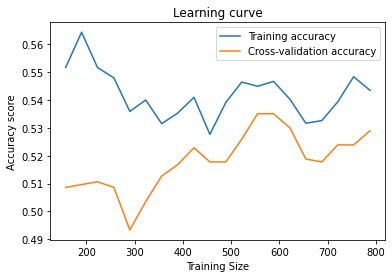

In [152]:
# ------ HERE ------

# plug in suitable hyper-parameters


# 여기만 바꾸면 된다. 
plot_model = svm.SVC(kernel='sigmoid', C=10, gamma=0.01)


train_sizes_seed100, train_scores_seed100, val_scores_seed100 = learning_curve(plot_model, 
                                                                X_train, 
                                                                y_train, 
                                                                cv=5, 
                                                                scoring='accuracy', 
                                                                n_jobs=-1, # 이거 바꾸고 싶으면 바꾸고  
                                                                train_sizes=np.linspace(0.2, 1, 20), 
                                                                verbose=2)


train_mean_seed100 = np.mean(train_scores_seed100, axis = 1)
train_std_seed100  = np.std(train_scores_seed100, axis=1)
val_mean_seed100   = np.mean(val_scores_seed100, axis=1)
val_std_seed100    = np.std(val_scores_seed100, axis=1)

plt.plot(train_sizes_seed100, train_mean_seed100, label='Training accuracy')
plt.plot(train_sizes_seed100, val_mean_seed100,   label='Cross-validation accuracy')
plt.title ('Learning curve')
plt.xlabel('Training Size')
plt.ylabel('Accuracy score')
plt.legend(loc='best')
plt.show()

## Seed 1234

In [153]:
seed = 1234
X_train, X_test, y_train, y_test = train_test_split(X_s, y_s, test_size=0.3, random_state=seed)  
folds = KFold(n_splits = 5, shuffle = True, random_state=seed)

In [154]:
# svm_hyper_params = [ 
#                         {
#                         'gamma': np.logspace(-4, -1, 4),
#                         'C': np.logspace(-3, 1, 5),
#                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']
#                         }
#                     ]

# # specify model
# svm_model = svm.SVC()

# # set up GridSearchCV()
# svm_model_cv = GridSearchCV(estimator = svm_model, 
#                             param_grid = svm_hyper_params, 
#                             scoring= 'accuracy', 
#                             cv = folds, 
#                             verbose = 2,
#                             return_train_score=True,
#                             n_jobs=-1)      

# # fit the model
# svm_model_cv.fit(X_train, y_train)
# print("best hyper parameters", svm_model_cv.best_params_)
# svm_y_pred = svm_model_cv.predict(X_test)

# # accuracy 
# print("Accuracy:", metrics.accuracy_score(y_test, svm_y_pred))
# # f1 score 
# print("F1 score micro:", f1_score(y_test, svm_y_pred, average='micro'))
# print("F1 score binary:", f1_score(y_test, svm_y_pred, average='binary'))

# print("\nclassification report:\n", classification_report(y_test, svm_y_pred))

[learning_curve] Training set sizes: [157 190 223 257 290 323 356 389 423 456 489 522 555 588 622 655 688 721
 754 788]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  50 out of 100 | elapsed:    1.3s remaining:    1.3s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    2.7s finished


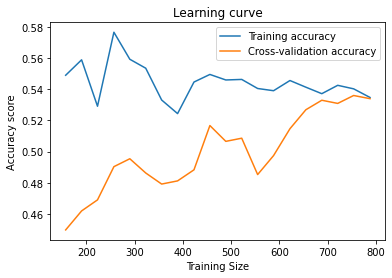

In [155]:
plot_model = svm.SVC(kernel='sigmoid', C=10, gamma=0.01)

train_sizes_seed1234, train_scores_seed1234, val_scores_seed1234 = learning_curve(plot_model, 
                                                                X_train, 
                                                                y_train, 
                                                                cv=5, 
                                                                scoring='accuracy', 
                                                                n_jobs=-1, # 이거 바꾸고 싶으면 바꾸고  
                                                                train_sizes=np.linspace(0.2, 1, 20), 
                                                                verbose=2)


train_mean_seed1234 = np.mean(train_scores_seed1234, axis = 1)
train_std_seed1234  = np.std(train_scores_seed1234, axis=1)
val_mean_seed1234   = np.mean(val_scores_seed1234, axis=1)
val_std_seed1234    = np.std(val_scores_seed1234, axis=1)

plt.plot(train_sizes_seed1234, train_mean_seed1234, label='Training accuracy')
plt.plot(train_sizes_seed1234, val_mean_seed1234,   label='Cross-validation accuracy')
plt.title ('Learning curve')
plt.xlabel('Training Size')
plt.ylabel('Accuracy score')
plt.legend(loc='best')
plt.show()

## Seed 500

In [156]:
seed = 500
X_train, X_test, y_train, y_test = train_test_split(X_s, y_s, test_size=0.3, random_state=seed)  
folds = KFold(n_splits = 5, shuffle = True, random_state=seed)

In [157]:
# svm_hyper_params = [ 
#                         {
#                         'gamma': np.logspace(-4, -1, 4),
#                         'C': np.logspace(-3, 1, 5),
#                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']
#                         }
#                     ]

# # specify model
# svm_model = svm.SVC()

# # set up GridSearchCV()
# svm_model_cv = GridSearchCV(estimator = svm_model, 
#                             param_grid = svm_hyper_params, 
#                             scoring= 'accuracy', 
#                             cv = folds, 
#                             verbose = 2,
#                             return_train_score=True,
#                             n_jobs=-1)      

# # fit the model
# svm_model_cv.fit(X_train, y_train)
# print("best hyper parameters", svm_model_cv.best_params_)
# svm_y_pred = svm_model_cv.predict(X_test)

# # accuracy 
# print("Accuracy:", metrics.accuracy_score(y_test, svm_y_pred))
# # f1 score 
# print("F1 score micro:", f1_score(y_test, svm_y_pred, average='micro'))
# print("F1 score binary:", f1_score(y_test, svm_y_pred, average='binary'))

# print("\nclassification report:\n", classification_report(y_test, svm_y_pred))

[learning_curve] Training set sizes: [157 190 223 257 290 323 356 389 423 456 489 522 555 588 622 655 688 721
 754 788]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  50 out of 100 | elapsed:    1.2s remaining:    1.2s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    2.6s finished


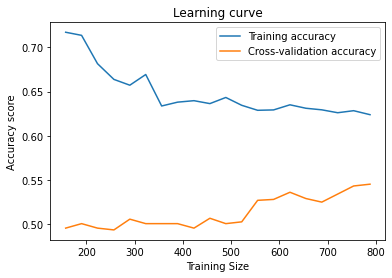

In [158]:
plot_model = svm.SVC(kernel='rbf', C=10, gamma=0.1)

train_sizes_seed500, train_scores_seed500, val_scores_seed500 = learning_curve(plot_model, 
                                                                X_train, 
                                                                y_train, 
                                                                cv=5, 
                                                                scoring='accuracy', 
                                                                n_jobs=-1, # 이거 바꾸고 싶으면 바꾸고  
                                                                train_sizes=np.linspace(0.2, 1, 20), 
                                                                verbose=2)


train_mean_seed500 = np.mean(train_scores_seed500, axis = 1)
train_std_seed500  = np.std(train_scores_seed500, axis=1)
val_mean_seed500   = np.mean(val_scores_seed500, axis=1)
val_std_seed500    = np.std(val_scores_seed500, axis=1)

plt.plot(train_sizes_seed500, train_mean_seed500, label='Training accuracy')
plt.plot(train_sizes_seed500, val_mean_seed500,   label='Cross-validation accuracy')
plt.title ('Learning curve')
plt.xlabel('Training Size')
plt.ylabel('Accuracy score')
plt.legend(loc='best')
plt.show()

In [159]:
# learning curve considering different seeds 

In [160]:
acc_avg = list()
acc_se  = list()

val_avg = list()
val_se  = list()

for i in range(len(train_sizes_seed100)):
    acc_avg.append(np.mean([train_mean_seed100[i], train_mean_seed500[i], train_mean_seed1234[i]]))
    acc_se .append(np.std ([train_mean_seed100[i], train_mean_seed500[i], train_mean_seed1234[i]]) / np.sqrt(3))
    
    val_avg.append(np.mean([val_mean_seed100[i], val_mean_seed500[i], val_mean_seed1234[i]]))
    val_se .append(np.std ([val_mean_seed100[i], val_mean_seed500[i], val_mean_seed1234[i]]) / np.sqrt(3))

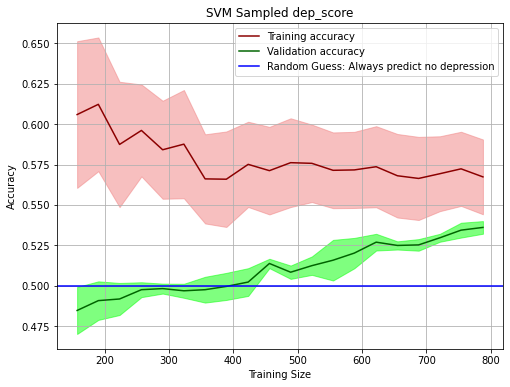

In [161]:
fig, ax = plt.subplots(figsize=(8, 6))

ax.plot(train_sizes_seed100, acc_avg, c='darkred', label='Training accuracy')
ax.fill_between(train_sizes_seed100, np.subtract(acc_avg, acc_se), np.add(acc_avg, acc_se), color='lightcoral', alpha=0.5)

ax.plot(train_sizes_seed100, val_avg, c='darkgreen', label='Validation accuracy')
ax.fill_between(train_sizes_seed100, np.subtract(val_avg, val_se), np.add(val_avg, val_se), color='lime', alpha=0.5)

ax.set_xlabel('Training Size')
ax.set_ylabel('Accuracy')
ax.set_title('SVM Sampled dep_score')
ax.axhline(y=0.5, color='blue', linestyle='-', label='Random Guess: Always predict no depression')
ax.legend()
ax.grid()

The learning algorithm suffers from high variance. The training and validation curve look like it is converging. Training with more data is likely to help. Although they converge, the error is quite high. This indicates that it is unlikely to have the relationship between screen time and mental health.

# Logistic Regression

## Seed 100

In [162]:
seed = 100
X_train, X_test, y_train, y_test = train_test_split(X_s, y_s, test_size=0.3, random_state=seed)  
folds = KFold(n_splits = 5, shuffle = True, random_state=seed)

In [163]:
# log_hyper_params = [ 
#                         {
#                         'C': np.logspace(-4, 2, 7),
#                         'solver' : ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
#                         'penalty' : ['l1', 'l2', 'elasticnet', 'none'],
#                         'multi_class' : ['auto', 'ovr', 'multinomial']
#                         }
#                     ]

# # specify model
# log_model = LogisticRegression()

# # set up GridSearchCV()
# log_model_cv = GridSearchCV(estimator = log_model, 
#                             param_grid = log_hyper_params, 
#                             scoring= 'accuracy', 
#                             cv = folds, 
#                             verbose = 2,
#                             return_train_score=True,
#                             n_jobs=-1)  

# # fit the model
# log_model_cv.fit(X_train, y_train)
# print("best hyper parameters", log_model_cv.best_params_)
# log_y_pred = log_model_cv.predict(X_test)

# # accuracy 
# print("Accuracy:", metrics.accuracy_score(y_test, log_y_pred))
# # f1 score 
# print("F1 score micro:", f1_score(y_test, log_y_pred, average='micro'))
# print("F1 score binary:", f1_score(y_test, log_y_pred, average='binary'))

# print("\nclassification report:\n", classification_report(y_test, log_y_pred))

[learning_curve] Training set sizes: [157 190 223 257 290 323 356 389 423 456 489 522 555 588 622 655 688 721
 754 788]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  50 out of 100 | elapsed:    0.5s remaining:    0.5s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.8s finished


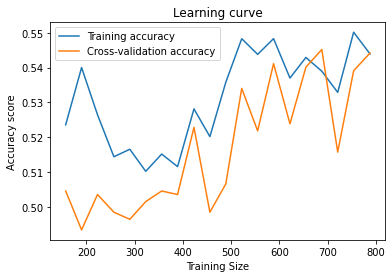

In [164]:
# ------ HERE ------

# plug in suitable hyper-parameters


# 여기만 바꾸면 된다. 
plot_model = LogisticRegression(C=0.1, multi_class='auto', penalty='l1', solver='saga')


train_sizes_seed100, train_scores_seed100, val_scores_seed100 = learning_curve(plot_model, 
                                                                X_train, 
                                                                y_train, 
                                                                cv=5, 
                                                                scoring='accuracy', 
                                                                n_jobs=-1, # 이거 바꾸고 싶으면 바꾸고  
                                                                train_sizes=np.linspace(0.2, 1, 20), 
                                                                verbose=2)


train_mean_seed100 = np.mean(train_scores_seed100, axis = 1)
train_std_seed100  = np.std(train_scores_seed100, axis=1)
val_mean_seed100   = np.mean(val_scores_seed100, axis=1)
val_std_seed100    = np.std(val_scores_seed100, axis=1)

plt.plot(train_sizes_seed100, train_mean_seed100, label='Training accuracy')
plt.plot(train_sizes_seed100, val_mean_seed100,   label='Cross-validation accuracy')
plt.title ('Learning curve')
plt.xlabel('Training Size')
plt.ylabel('Accuracy score')
plt.legend(loc='best')
plt.show()

## Seed 1234

In [165]:
seed = 1234
X_train, X_test, y_train, y_test = train_test_split(X_s, y_s, test_size=0.3, random_state=seed)  
folds = KFold(n_splits = 5, shuffle = True, random_state=seed)

In [166]:
# log_hyper_params = [ 
#                         {
#                         'C': np.logspace(-4, 2, 7),
#                         'solver' : ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
#                         'penalty' : ['l1', 'l2', 'elasticnet', 'none'],
#                         'multi_class' : ['auto', 'ovr', 'multinomial']
#                         }
#                     ]

# # specify model
# log_model = LogisticRegression()

# # set up GridSearchCV()
# log_model_cv = GridSearchCV(estimator = log_model, 
#                             param_grid = log_hyper_params, 
#                             scoring= 'accuracy', 
#                             cv = folds, 
#                             verbose = 2,
#                             return_train_score=True,
#                             n_jobs=-1)  

# # fit the model
# log_model_cv.fit(X_train, y_train)
# print("best hyper parameters", log_model_cv.best_params_)
# log_y_pred = log_model_cv.predict(X_test)

# # accuracy 
# print("Accuracy:", metrics.accuracy_score(y_test, log_y_pred))
# # f1 score 
# print("F1 score micro:", f1_score(y_test, log_y_pred, average='micro'))
# print("F1 score binary:", f1_score(y_test, log_y_pred, average='binary'))

# print("\nclassification report:\n", classification_report(y_test, log_y_pred))

[learning_curve] Training set sizes: [157 190 223 257 290 323 356 389 423 456 489 522 555 588 622 655 688 721
 754 788]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  50 out of 100 | elapsed:    0.4s remaining:    0.4s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.7s finished


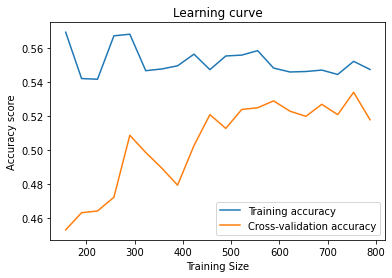

In [167]:
plot_model = LogisticRegression(C=0.1, multi_class='auto', penalty='l2', solver='liblinear')

train_sizes_seed1234, train_scores_seed1234, val_scores_seed1234 = learning_curve(plot_model, 
                                                                X_train, 
                                                                y_train, 
                                                                cv=5, 
                                                                scoring='accuracy', 
                                                                n_jobs=-1, # 이거 바꾸고 싶으면 바꾸고  
                                                                train_sizes=np.linspace(0.2, 1, 20), 
                                                                verbose=2)


train_mean_seed1234 = np.mean(train_scores_seed1234, axis = 1)
train_std_seed1234  = np.std(train_scores_seed1234, axis=1)
val_mean_seed1234   = np.mean(val_scores_seed1234, axis=1)
val_std_seed1234    = np.std(val_scores_seed1234, axis=1)

plt.plot(train_sizes_seed1234, train_mean_seed1234, label='Training accuracy')
plt.plot(train_sizes_seed1234, val_mean_seed1234,   label='Cross-validation accuracy')
plt.title ('Learning curve')
plt.xlabel('Training Size')
plt.ylabel('Accuracy score')
plt.legend(loc='best')
plt.show()

## Seed 500

In [168]:
seed = 500
X_train, X_test, y_train, y_test = train_test_split(X_s, y_s, test_size=0.3, random_state=seed)  
folds = KFold(n_splits = 5, shuffle = True, random_state=seed)

In [169]:
# log_hyper_params = [ 
#                         {
#                         'C': np.logspace(-4, 2, 7),
#                         'solver' : ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
#                         'penalty' : ['l1', 'l2', 'elasticnet', 'none'],
#                         'multi_class' : ['auto', 'ovr', 'multinomial']
#                         }
#                     ]

# # specify model
# log_model = LogisticRegression()

# # set up GridSearchCV()
# log_model_cv = GridSearchCV(estimator = log_model, 
#                             param_grid = log_hyper_params, 
#                             scoring= 'accuracy', 
#                             cv = folds, 
#                             verbose = 2,
#                             return_train_score=True,
#                             n_jobs=-1)  

# # fit the model
# log_model_cv.fit(X_train, y_train)
# print("best hyper parameters", log_model_cv.best_params_)
# log_y_pred = log_model_cv.predict(X_test)

# # accuracy 
# print("Accuracy:", metrics.accuracy_score(y_test, log_y_pred))
# # f1 score 
# print("F1 score micro:", f1_score(y_test, log_y_pred, average='micro'))
# print("F1 score binary:", f1_score(y_test, log_y_pred, average='binary'))

# print("\nclassification report:\n", classification_report(y_test, log_y_pred))

[learning_curve] Training set sizes: [157 190 223 257 290 323 356 389 423 456 489 522 555 588 622 655 688 721
 754 788]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  50 out of 100 | elapsed:    0.4s remaining:    0.4s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.6s finished


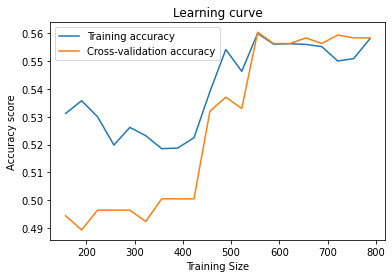

In [170]:
plot_model = LogisticRegression(C=0.1, multi_class='auto', penalty='l1', solver='liblinear')

train_sizes_seed500, train_scores_seed500, val_scores_seed500 = learning_curve(plot_model, 
                                                                X_train, 
                                                                y_train, 
                                                                cv=5, 
                                                                scoring='accuracy', 
                                                                n_jobs=-1, # 이거 바꾸고 싶으면 바꾸고  
                                                                train_sizes=np.linspace(0.2, 1, 20), 
                                                                verbose=2)


train_mean_seed500 = np.mean(train_scores_seed500, axis = 1)
train_std_seed500  = np.std(train_scores_seed500, axis=1)
val_mean_seed500   = np.mean(val_scores_seed500, axis=1)
val_std_seed500    = np.std(val_scores_seed500, axis=1)

plt.plot(train_sizes_seed500, train_mean_seed500, label='Training accuracy')
plt.plot(train_sizes_seed500, val_mean_seed500,   label='Cross-validation accuracy')
plt.title ('Learning curve')
plt.xlabel('Training Size')
plt.ylabel('Accuracy score')
plt.legend(loc='best')
plt.show()

In [171]:
# learning curve considering different seeds 

In [172]:
acc_avg = list()
acc_se  = list()

val_avg = list()
val_se  = list()

for i in range(len(train_sizes_seed100)):
    acc_avg.append(np.mean([train_mean_seed100[i], train_mean_seed500[i], train_mean_seed1234[i]]))
    acc_se .append(np.std ([train_mean_seed100[i], train_mean_seed500[i], train_mean_seed1234[i]]) / np.sqrt(3))
    
    val_avg.append(np.mean([val_mean_seed100[i], val_mean_seed500[i], val_mean_seed1234[i]]))
    val_se .append(np.std ([val_mean_seed100[i], val_mean_seed500[i], val_mean_seed1234[i]]) / np.sqrt(3))

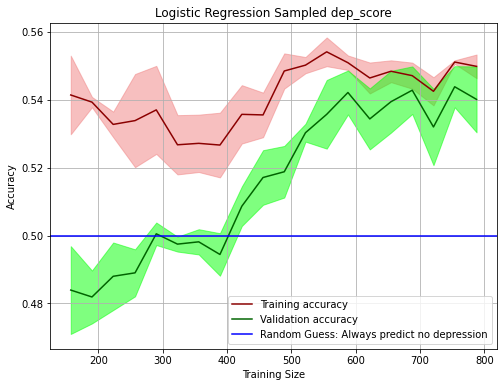

In [173]:
fig, ax = plt.subplots(figsize=(8, 6))

ax.plot(train_sizes_seed100, acc_avg, c='darkred', label='Training accuracy')
ax.fill_between(train_sizes_seed100, np.subtract(acc_avg, acc_se), np.add(acc_avg, acc_se), color='lightcoral', alpha=0.5)

ax.plot(train_sizes_seed100, val_avg, c='darkgreen', label='Validation accuracy')
ax.fill_between(train_sizes_seed100, np.subtract(val_avg, val_se), np.add(val_avg, val_se), color='lime', alpha=0.5)

ax.set_xlabel('Training Size')
ax.set_ylabel('Accuracy')
ax.set_title('Logistic Regression Sampled dep_score')
ax.axhline(y=0.5, color='blue', linestyle='-', label='Random Guess: Always predict no depression')
ax.legend()
ax.grid()

The training and validation curve look like it is converging. Although they converge, the error is quite high. This indicates that it is unlikely to have the relationship between screen time and mental health. Maybe LR model is not appropriate to find the relationship.

# KNN

## Seed 100

In [174]:
seed = 100
X_train, X_test, y_train, y_test = train_test_split(X_s, y_s, test_size=0.3, random_state=seed)  
folds = KFold(n_splits = 5, shuffle = True, random_state=seed)

In [175]:
# knn_hyper_params = [ 
#                         {
#                         'weights' : ['uniform', 'distance'],
#                         'algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute'],
#                         'leaf_size' : np.linspace(2, 100, 10, dtype=int),
#                         'n_neighbors' : [int(x) for x in np.linspace(2, 50, 10)]
#                         }
#                     ]

# # specify model

# # THIS SECTION SHOULD BE CHANGED.
# # n_neighbors  SHOULD BE MODIFIED TO ANOTHER VALUE DEPENDING ON THE TARGET VALUE.
# knn_model = KNeighborsClassifier()

# # set up GridSearchCV()
# knn_model_cv = GridSearchCV(estimator = knn_model, 
#                             param_grid = knn_hyper_params, 
#                             scoring= 'accuracy', 
#                             cv = folds, 
#                             verbose = 2,
#                             return_train_score=True,
#                             n_jobs=-1)  

# # fit the model
# knn_model_cv.fit(X_train, y_train)
# print("best hyper parameters", knn_model_cv.best_params_)
# knn_y_pred = knn_model_cv.predict(X_test)

# # accuracy 
# print("Accuracy:", metrics.accuracy_score(y_test, knn_y_pred))
# # f1 score 
# print("F1 score micro:", f1_score(y_test, knn_y_pred, average='micro'))
# print("F1 score binary:", f1_score(y_test, knn_y_pred, average='binary'))

# print("\nclassification report:\n", classification_report(y_test, knn_y_pred))

[learning_curve] Training set sizes: [157 190 223 257 290 323 356 389 423 456 489 522 555 588 622 655 688 721
 754 788]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  50 out of 100 | elapsed:    1.8s remaining:    1.8s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    3.5s finished


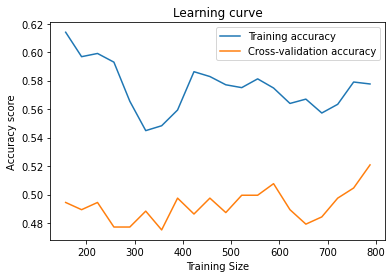

In [176]:
# ------ HERE ------

# plug in suitable hyper-parameters


# 여기만 바꾸면 된다. 
plot_model = KNeighborsClassifier(algorithm='auto', leaf_size=12, weights='uniform', n_neighbors=28)


train_sizes_seed100, train_scores_seed100, val_scores_seed100 = learning_curve(plot_model, 
                                                                X_train, 
                                                                y_train, 
                                                                cv=5, 
                                                                scoring='accuracy', 
                                                                n_jobs=-1, # 이거 바꾸고 싶으면 바꾸고  
                                                                train_sizes=np.linspace(0.2, 1, 20), 
                                                                verbose=2)


train_mean_seed100 = np.mean(train_scores_seed100, axis = 1)
train_std_seed100  = np.std(train_scores_seed100, axis=1)
val_mean_seed100   = np.mean(val_scores_seed100, axis=1)
val_std_seed100    = np.std(val_scores_seed100, axis=1)

plt.plot(train_sizes_seed100, train_mean_seed100, label='Training accuracy')
plt.plot(train_sizes_seed100, val_mean_seed100,   label='Cross-validation accuracy')
plt.title ('Learning curve')
plt.xlabel('Training Size')
plt.ylabel('Accuracy score')
plt.legend(loc='best')
plt.show()

## Seed 1234

In [177]:
seed = 1234
X_train, X_test, y_train, y_test = train_test_split(X_s, y_s, test_size=0.3, random_state=seed)  
folds = KFold(n_splits = 5, shuffle = True, random_state=seed)

In [178]:
# knn_hyper_params = [ 
#                         {
#                         'weights' : ['uniform', 'distance'],
#                         'algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute'],
#                         'leaf_size' : np.linspace(2, 100, 10, dtype=int),
#                         'n_neighbors' : [int(x) for x in np.linspace(2, 50, 10)]
#                         }
#                     ]

# # specify model

# # THIS SECTION SHOULD BE CHANGED.
# # n_neighbors  SHOULD BE MODIFIED TO ANOTHER VALUE DEPENDING ON THE TARGET VALUE.
# knn_model = KNeighborsClassifier()

# # set up GridSearchCV()
# knn_model_cv = GridSearchCV(estimator = knn_model, 
#                             param_grid = knn_hyper_params, 
#                             scoring= 'accuracy', 
#                             cv = folds, 
#                             verbose = 2,
#                             return_train_score=True,
#                             n_jobs=-1)  

# # fit the model
# knn_model_cv.fit(X_train, y_train)
# print("best hyper parameters", knn_model_cv.best_params_)
# knn_y_pred = knn_model_cv.predict(X_test)

# # accuracy 
# print("Accuracy:", metrics.accuracy_score(y_test, knn_y_pred))
# # f1 score 
# print("F1 score micro:", f1_score(y_test, knn_y_pred, average='micro'))
# print("F1 score binary:", f1_score(y_test, knn_y_pred, average='binary'))

# print("\nclassification report:\n", classification_report(y_test, knn_y_pred))

[learning_curve] Training set sizes: [157 190 223 257 290 323 356 389 423 456 489 522 555 588 622 655 688 721
 754 788]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  50 out of 100 | elapsed:    1.6s remaining:    1.6s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    3.2s finished


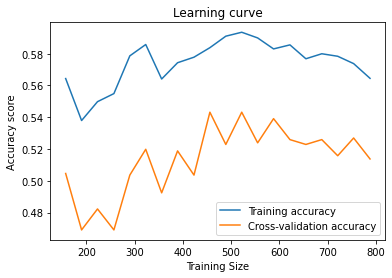

In [179]:
plot_model = KNeighborsClassifier(algorithm='brute', leaf_size=2, weights='uniform', n_neighbors=34)

train_sizes_seed1234, train_scores_seed1234, val_scores_seed1234 = learning_curve(plot_model, 
                                                                X_train, 
                                                                y_train, 
                                                                cv=5, 
                                                                scoring='accuracy', 
                                                                n_jobs=-1, # 이거 바꾸고 싶으면 바꾸고  
                                                                train_sizes=np.linspace(0.2, 1, 20), 
                                                                verbose=2)


train_mean_seed1234 = np.mean(train_scores_seed1234, axis = 1)
train_std_seed1234  = np.std(train_scores_seed1234, axis=1)
val_mean_seed1234   = np.mean(val_scores_seed1234, axis=1)
val_std_seed1234    = np.std(val_scores_seed1234, axis=1)

plt.plot(train_sizes_seed1234, train_mean_seed1234, label='Training accuracy')
plt.plot(train_sizes_seed1234, val_mean_seed1234,   label='Cross-validation accuracy')
plt.title ('Learning curve')
plt.xlabel('Training Size')
plt.ylabel('Accuracy score')
plt.legend(loc='best')
plt.show()

## Seed 500

In [180]:
seed = 500
X_train, X_test, y_train, y_test = train_test_split(X_s, y_s, test_size=0.3, random_state=seed)  
folds = KFold(n_splits = 5, shuffle = True, random_state=seed)

In [181]:
# knn_hyper_params = [ 
#                         {
#                         'weights' : ['uniform', 'distance'],
#                         'algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute'],
#                         'leaf_size' : np.linspace(2, 100, 10, dtype=int),
#                         'n_neighbors' : [int(x) for x in np.linspace(2, 50, 10)]
#                         }
#                     ]

# # specify model

# # THIS SECTION SHOULD BE CHANGED.
# # n_neighbors  SHOULD BE MODIFIED TO ANOTHER VALUE DEPENDING ON THE TARGET VALUE.
# knn_model = KNeighborsClassifier()

# # set up GridSearchCV()
# knn_model_cv = GridSearchCV(estimator = knn_model, 
#                             param_grid = knn_hyper_params, 
#                             scoring= 'accuracy', 
#                             cv = folds, 
#                             verbose = 2,
#                             return_train_score=True,
#                             n_jobs=-1)  

# # fit the model
# knn_model_cv.fit(X_train, y_train)
# print("best hyper parameters", knn_model_cv.best_params_)
# knn_y_pred = knn_model_cv.predict(X_test)

# # accuracy 
# print("Accuracy:", metrics.accuracy_score(y_test, knn_y_pred))
# # f1 score 
# print("F1 score micro:", f1_score(y_test, knn_y_pred, average='micro'))
# print("F1 score binary:", f1_score(y_test, knn_y_pred, average='binary'))

# print("\nclassification report:\n", classification_report(y_test, knn_y_pred))

[learning_curve] Training set sizes: [157 190 223 257 290 323 356 389 423 456 489 522 555 588 622 655 688 721
 754 788]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  50 out of 100 | elapsed:    1.5s remaining:    1.5s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    3.1s finished


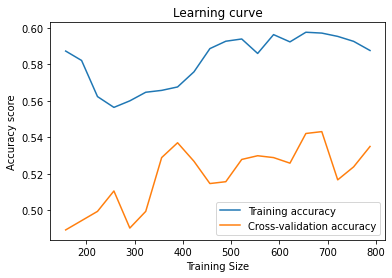

In [182]:
plot_model = KNeighborsClassifier(algorithm='auto', leaf_size=56, weights='uniform', n_neighbors=23)

train_sizes_seed500, train_scores_seed500, val_scores_seed500 = learning_curve(plot_model, 
                                                                X_train, 
                                                                y_train, 
                                                                cv=5, 
                                                                scoring='accuracy', 
                                                                n_jobs=-1, # 이거 바꾸고 싶으면 바꾸고  
                                                                train_sizes=np.linspace(0.2, 1, 20), 
                                                                verbose=2)


train_mean_seed500 = np.mean(train_scores_seed500, axis = 1)
train_std_seed500  = np.std(train_scores_seed500, axis=1)
val_mean_seed500   = np.mean(val_scores_seed500, axis=1)
val_std_seed500    = np.std(val_scores_seed500, axis=1)

plt.plot(train_sizes_seed500, train_mean_seed500, label='Training accuracy')
plt.plot(train_sizes_seed500, val_mean_seed500,   label='Cross-validation accuracy')
plt.title ('Learning curve')
plt.xlabel('Training Size')
plt.ylabel('Accuracy score')
plt.legend(loc='best')
plt.show()

In [183]:
# learning curve considering different seeds

In [184]:
acc_avg = list()
acc_se  = list()

val_avg = list()
val_se  = list()

for i in range(len(train_sizes_seed100)):
    acc_avg.append(np.mean([train_mean_seed100[i], train_mean_seed500[i], train_mean_seed1234[i]]))
    acc_se .append(np.std ([train_mean_seed100[i], train_mean_seed500[i], train_mean_seed1234[i]]) / np.sqrt(3))
    
    val_avg.append(np.mean([val_mean_seed100[i], val_mean_seed500[i], val_mean_seed1234[i]]))
    val_se .append(np.std ([val_mean_seed100[i], val_mean_seed500[i], val_mean_seed1234[i]]) / np.sqrt(3))

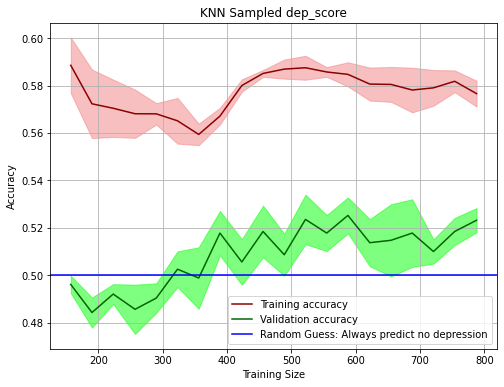

In [185]:
fig, ax = plt.subplots(figsize=(8, 6))

ax.plot(train_sizes_seed100, acc_avg, c='darkred', label='Training accuracy')
ax.fill_between(train_sizes_seed100, np.subtract(acc_avg, acc_se), np.add(acc_avg, acc_se), color='lightcoral', alpha=0.5)

ax.plot(train_sizes_seed100, val_avg, c='darkgreen', label='Validation accuracy')
ax.fill_between(train_sizes_seed100, np.subtract(val_avg, val_se), np.add(val_avg, val_se), color='lime', alpha=0.5)

ax.set_xlabel('Training Size')
ax.set_ylabel('Accuracy')
ax.set_title('KNN Sampled dep_score')
ax.axhline(y=0.5, color='blue', linestyle='-', label='Random Guess: Always predict no depression')
ax.legend()
ax.grid()

The error is high. Also, it seems like they are not converging. KNN is not a valid model for detecting the relationship between screen time and mental health?

# Random Forest

## Seed 100

In [186]:
seed = 100
X_train, X_test, y_train, y_test = train_test_split(X_s, y_s, test_size=0.3, random_state=seed)  
folds = KFold(n_splits = 5, shuffle = True, random_state=seed)

In [187]:
# rf_hyper_params = [ 
#                         {
#                             'n_estimators' : [int(x) for x in np.linspace(5, 50, 5)],
#                             'criterion' : ['gini', 'entropy'],
#                             'max_depth' : [int(x) for x in np.linspace(2, 50, 5)],
#                             'min_samples_split' : [int(x) for x in np.linspace(2, 50, 5)],
#                             'min_samples_leaf' : [int(x) for x in np.linspace(2, 50, 5)],
#                             'max_features' : ['auto', 'sqrt', 'log2'],
#                             'bootstrap' : [True, False]

#                         }
#                     ]

# # specify model

# # THIS SECTION SHOULD BE CHANGED.
# # n_neighbors  SHOULD BE MODIFIED TO ANOTHER VALUE DEPENDING ON THE TARGET VALUE.
# rf_model = RandomForestClassifier()

# # set up GridSearchCV()
# rf_model_cv = GridSearchCV(estimator = rf_model, 
#                             param_grid = rf_hyper_params, 
#                             scoring= 'accuracy', 
#                             cv = folds, 
#                             verbose = 2,
#                             return_train_score=True,
#                             n_jobs=-1) 

# # fit the model
# rf_model_cv.fit(X_train, y_train)
# print("best hyper parameters", rf_model_cv.best_params_)
# rf_y_pred = rf_model_cv.predict(X_test)

# # accuracy 
# print("Accuracy:", metrics.accuracy_score(y_test, rf_y_pred))
# # f1 score 
# print("F1 score micro:", f1_score(y_test, rf_y_pred, average='micro'))
# print("F1 score binary:", f1_score(y_test, rf_y_pred, average='binary'))

# print("\nclassification report:\n", classification_report(y_test, rf_y_pred))

[learning_curve] Training set sizes: [157 190 223 257 290 323 356 389 423 456 489 522 555 588 622 655 688 721
 754 788]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  50 out of 100 | elapsed:    0.8s remaining:    0.8s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    1.4s finished


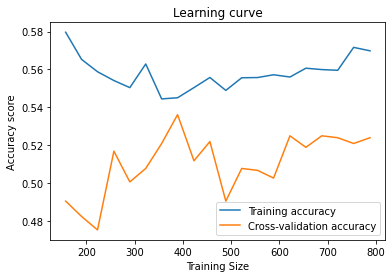

In [188]:
# ------ HERE ------

# plug in suitable hyper-parameters


# 여기만 바꾸면 된다. 
plot_model = RandomForestClassifier(bootstrap=True, criterion='gini', max_depth=14, max_features='auto', min_samples_leaf=26, min_samples_split=38, n_estimators=5)

train_sizes_seed100, train_scores_seed100, val_scores_seed100 = learning_curve(plot_model, 
                                                                X_train, 
                                                                y_train, 
                                                                cv=5, 
                                                                scoring='accuracy', 
                                                                n_jobs=-1, # 이거 바꾸고 싶으면 바꾸고  
                                                                train_sizes=np.linspace(0.2, 1, 20), 
                                                                verbose=2)


train_mean_seed100 = np.mean(train_scores_seed100, axis = 1)
train_std_seed100  = np.std(train_scores_seed100, axis=1)
val_mean_seed100   = np.mean(val_scores_seed100, axis=1)
val_std_seed100    = np.std(val_scores_seed100, axis=1)

plt.plot(train_sizes_seed100, train_mean_seed100, label='Training accuracy')
plt.plot(train_sizes_seed100, val_mean_seed100,   label='Cross-validation accuracy')
plt.title ('Learning curve')
plt.xlabel('Training Size')
plt.ylabel('Accuracy score')
plt.legend(loc='best')
plt.show()

## Seed 1234

In [189]:
seed = 1234
X_train, X_test, y_train, y_test = train_test_split(X_s, y_s, test_size=0.3, random_state=seed)  
folds = KFold(n_splits = 5, shuffle = True, random_state=seed)

In [190]:
# rf_hyper_params = [ 
#                         {
#                             'n_estimators' : [int(x) for x in np.linspace(5, 50, 5)],
#                             'criterion' : ['gini', 'entropy'],
#                             'max_depth' : [int(x) for x in np.linspace(2, 50, 5)],
#                             'min_samples_split' : [int(x) for x in np.linspace(2, 50, 5)],
#                             'min_samples_leaf' : [int(x) for x in np.linspace(2, 50, 5)],
#                             'max_features' : ['auto', 'sqrt', 'log2'],
#                             'bootstrap' : [True, False]

#                         }
#                     ]

# # specify model

# # THIS SECTION SHOULD BE CHANGED.
# # n_neighbors  SHOULD BE MODIFIED TO ANOTHER VALUE DEPENDING ON THE TARGET VALUE.
# rf_model = RandomForestClassifier()

# # set up GridSearchCV()
# rf_model_cv = GridSearchCV(estimator = rf_model, 
#                             param_grid = rf_hyper_params, 
#                             scoring= 'accuracy', 
#                             cv = folds, 
#                             verbose = 2,
#                             return_train_score=True,
#                             n_jobs=-1) 

# # fit the model
# rf_model_cv.fit(X_train, y_train)
# print("best hyper parameters", rf_model_cv.best_params_)
# rf_y_pred = rf_model_cv.predict(X_test)

# # accuracy 
# print("Accuracy:", metrics.accuracy_score(y_test, rf_y_pred))
# # f1 score 
# print("F1 score micro:", f1_score(y_test, rf_y_pred, average='micro'))
# print("F1 score binary:", f1_score(y_test, rf_y_pred, average='binary'))

# print("\nclassification report:\n", classification_report(y_test, rf_y_pred))

[learning_curve] Training set sizes: [157 190 223 257 290 323 356 389 423 456 489 522 555 588 622 655 688 721
 754 788]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  50 out of 100 | elapsed:    0.8s remaining:    0.8s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    1.5s finished


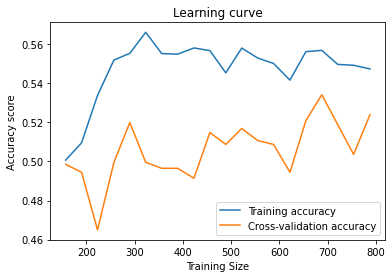

In [191]:
plot_model = RandomForestClassifier(bootstrap=True, criterion='gini', max_depth=26, max_features='log2', min_samples_leaf=50, min_samples_split=26, n_estimators=5)

train_sizes_seed1234, train_scores_seed1234, val_scores_seed1234 = learning_curve(plot_model, 
                                                                X_train, 
                                                                y_train, 
                                                                cv=5, 
                                                                scoring='accuracy', 
                                                                n_jobs=-1, # 이거 바꾸고 싶으면 바꾸고  
                                                                train_sizes=np.linspace(0.2, 1, 20), 
                                                                verbose=2)


train_mean_seed1234 = np.mean(train_scores_seed1234, axis = 1)
train_std_seed1234  = np.std(train_scores_seed1234, axis=1)
val_mean_seed1234   = np.mean(val_scores_seed1234, axis=1)
val_std_seed1234    = np.std(val_scores_seed1234, axis=1)

plt.plot(train_sizes_seed1234, train_mean_seed1234, label='Training accuracy')
plt.plot(train_sizes_seed1234, val_mean_seed1234,   label='Cross-validation accuracy')
plt.title ('Learning curve')
plt.xlabel('Training Size')
plt.ylabel('Accuracy score')
plt.legend(loc='best')
plt.show()

## Seed 500

In [192]:
seed = 500
X_train, X_test, y_train, y_test = train_test_split(X_s, y_s, test_size=0.3, random_state=seed)  
folds = KFold(n_splits = 5, shuffle = True, random_state=seed)

In [193]:
# rf_hyper_params = [ 
#                         {
#                             'n_estimators' : [int(x) for x in np.linspace(5, 50, 5)],
#                             'criterion' : ['gini', 'entropy'],
#                             'max_depth' : [int(x) for x in np.linspace(2, 50, 5)],
#                             'min_samples_split' : [int(x) for x in np.linspace(2, 50, 5)],
#                             'min_samples_leaf' : [int(x) for x in np.linspace(2, 50, 5)],
#                             'max_features' : ['auto', 'sqrt', 'log2'],
#                             'bootstrap' : [True, False]

#                         }
#                     ]

# # specify model

# # THIS SECTION SHOULD BE CHANGED.
# # n_neighbors  SHOULD BE MODIFIED TO ANOTHER VALUE DEPENDING ON THE TARGET VALUE.
# rf_model = RandomForestClassifier()

# # set up GridSearchCV()
# rf_model_cv = GridSearchCV(estimator = rf_model, 
#                             param_grid = rf_hyper_params, 
#                             scoring= 'accuracy', 
#                             cv = folds, 
#                             verbose = 2,
#                             return_train_score=True,
#                             n_jobs=-1) 

# # fit the model
# rf_model_cv.fit(X_train, y_train)
# print("best hyper parameters", rf_model_cv.best_params_)
# rf_y_pred = rf_model_cv.predict(X_test)

# # accuracy 
# print("Accuracy:", metrics.accuracy_score(y_test, rf_y_pred))
# # f1 score 
# print("F1 score micro:", f1_score(y_test, rf_y_pred, average='micro'))
# print("F1 score binary:", f1_score(y_test, rf_y_pred, average='binary'))

# print("\nclassification report:\n", classification_report(y_test, rf_y_pred))

[learning_curve] Training set sizes: [157 190 223 257 290 323 356 389 423 456 489 522 555 588 622 655 688 721
 754 788]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  50 out of 100 | elapsed:    0.8s remaining:    0.8s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    1.5s finished


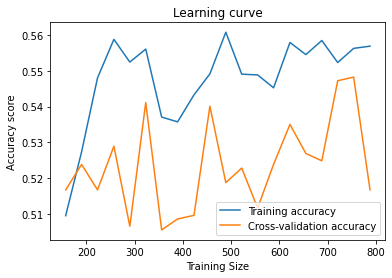

In [194]:
plot_model = RandomForestClassifier(bootstrap=True, criterion='gini', max_depth=14, max_features='sqrt', min_samples_leaf=50, min_samples_split=50, n_estimators=5)

train_sizes_seed500, train_scores_seed500, val_scores_seed500 = learning_curve(plot_model, 
                                                                X_train, 
                                                                y_train, 
                                                                cv=5, 
                                                                scoring='accuracy', 
                                                                n_jobs=-1, # 이거 바꾸고 싶으면 바꾸고  
                                                                train_sizes=np.linspace(0.2, 1, 20), 
                                                                verbose=2)


train_mean_seed500 = np.mean(train_scores_seed500, axis = 1)
train_std_seed500  = np.std(train_scores_seed500, axis=1)
val_mean_seed500   = np.mean(val_scores_seed500, axis=1)
val_std_seed500    = np.std(val_scores_seed500, axis=1)

plt.plot(train_sizes_seed500, train_mean_seed500, label='Training accuracy')
plt.plot(train_sizes_seed500, val_mean_seed500,   label='Cross-validation accuracy')
plt.title ('Learning curve')
plt.xlabel('Training Size')
plt.ylabel('Accuracy score')
plt.legend(loc='best')
plt.show()

In [195]:
# learning curve considering different seeds

In [196]:
acc_avg = list()
acc_se  = list()

val_avg = list()
val_se  = list()

for i in range(len(train_sizes_seed100)):
    acc_avg.append(np.mean([train_mean_seed100[i], train_mean_seed500[i], train_mean_seed1234[i]]))
    acc_se .append(np.std ([train_mean_seed100[i], train_mean_seed500[i], train_mean_seed1234[i]]) / np.sqrt(3))
    
    val_avg.append(np.mean([val_mean_seed100[i], val_mean_seed500[i], val_mean_seed1234[i]]))
    val_se .append(np.std ([val_mean_seed100[i], val_mean_seed500[i], val_mean_seed1234[i]]) / np.sqrt(3))

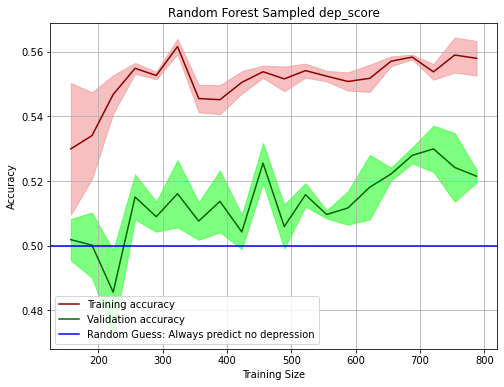

In [197]:
fig, ax = plt.subplots(figsize=(8, 6))

ax.plot(train_sizes_seed100, acc_avg, c='darkred', label='Training accuracy')
ax.fill_between(train_sizes_seed100, np.subtract(acc_avg, acc_se), np.add(acc_avg, acc_se), color='lightcoral', alpha=0.5)

ax.plot(train_sizes_seed100, val_avg, c='darkgreen', label='Validation accuracy')
ax.fill_between(train_sizes_seed100, np.subtract(val_avg, val_se), np.add(val_avg, val_se), color='lime', alpha=0.5)

ax.set_xlabel('Training Size')
ax.set_ylabel('Accuracy')
ax.set_title('Random Forest Sampled dep_score')
ax.axhline(y=0.5, color='blue', linestyle='-', label='Random Guess: Always predict no depression')
ax.legend()
ax.grid()

The error is high. Also, it seems like they are not converging. RF is not a valid model for detecting the relationship between screen time and mental health? 